In [1]:
### For selecting cell type phase markers to clone
rm(list=ls())
gc()
setwd("/hpc/group/pbenfeylab/CheWei/")

used    (Mb) gc trigger (Mb) max used (Mb)
Ncells  625483 33.5 1361470    72.8 1105100  59.1
Vcells 1159604  8.9 8388608    64.0 1802279  13.8

In [2]:
as.numeric(system("awk '/MemFree/ {print $2}' /proc/meminfo", intern=TRUE))
options(future.globals.maxSize = 600000 * 1024^2)

[1] 530921780

In [3]:
suppressMessages(library(Seurat))
suppressMessages(library(ggplot2))
suppressMessages(library(dplyr))
suppressMessages(library(ComplexHeatmap))
suppressMessages(library(circlize))
suppressMessages(library(RColorBrewer))
suppressMessages(library(tricycle))

In [4]:
sessionInfo()

R version 4.2.2 (2022-10-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: AlmaLinux 9.3 (Shamrock Pampas Cat)

Matrix products: default
BLAS/LAPACK: /hpc/group/pbenfeylab/ch416/miniconda3/envs/seu4/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    grid      stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] tricycle_1.6.0              SingleCellExperiment_1.20.0
 [3] SummarizedExperiment_1.28.0 Biobase_2.58.0             
 [5] GenomicRanges_1.50.0        GenomeInfoDb_1.34.8        
 [7] IRanges_2.32.0              S4Vectors_0.36.0           
 [9] B

In [ ]:
pro <- readRDS("./scRNA-seq/Integrated_Objects/rc.integrated_18S_WT_cell_cycle_seu4_all_genes_20230907.rds")
tra <- readRDS("./scRNA-seq/Integrated_Objects/rc.integrated_18S_WT_cell_cycle_transition_domain_seu4_all_genes_20240223.rds")
elo <- readRDS("./scRNA-seq/Integrated_Objects/rc.integrated_18S_WT_cell_cycle_elongation_seu4_all_genes_20240223.rds")
mat <- readRDS("./scRNA-seq/Integrated_Objects/rc.integrated_18S_WT_cell_cycle_maturation_distal_seu4_all_genes_20240223.rds")

In [5]:
rc.integrated <- readRDS("./tricycle/phloem_atlas_seu4_simplified.rds")
rc.integrated <- subset(rc.integrated, cells=colnames(rc.integrated)[which(rc.integrated$annotation=="dividing" | rc.integrated$annotation=="early PSE" | rc.integrated$annotation=="early/undetermined"| rc.integrated$annotation=="PSE"| rc.integrated$annotation=="MSE" | rc.integrated$annotation=="CC")])
rc.integrated <- subset(rc.integrated, cells=colnames(rc.integrated)[which(rc.integrated$time.anno.Li.crude=="Proliferation Domain")])
wanted_cols <- c("orig.ident", "annotation", "tricyclePosition","tricycleCCStage")
rc.integrated@meta.data <- rc.integrated@meta.data[,wanted_cols]
colnames(rc.integrated@meta.data) <- c("sample", "annotation","tricyclePosition","tricycleCCStage")

In [6]:
ccgl <- read.csv("./tradeseq/245_cell_cycle_related_genes_for_reference.csv")
ccgl <- ccgl$GeneID
rc.integrated <- RunPCA(rc.integrated,features = ccgl)
rc.integrated <- FindNeighbors(rc.integrated, dims = 1:10)
rc.integrated <- RunUMAP(rc.integrated, dims = 1:10)

Warning message in PrepDR(object = object, features = features, verbose = verbose):
“The following 3 features requested have not been scaled (running reduction without them): AT5G47500, AT1G33670, AT5G05900”
PC_ 1 
Positive:  AT5G55520, AT4G05190, AT1G16630, AT5G51600, AT4G14330, AT1G76310, AT4G26660, AT1G02730, AT4G01730, AT4G38062 
	   AT3G11520, AT1G03780, AT3G56100, AT3G15550, AT4G09060, AT1G20610, AT2G22610, AT5G60930, AT3G44050, AT1G18370 
	   AT3G23670, AT5G45700, AT4G35620, AT4G37490, AT3G55660, AT5G15510, AT5G56120, AT3G58650, AT3G26050, AT1G34355 
Negative:  AT3G12170, AT5G52220, AT2G20980, AT3G48490, AT1G80190, AT2G44580, AT4G00020, AT2G29680, AT3G23740, AT3G52115 
	   AT4G30860, AT4G31400, AT2G24970, AT1G75150, AT1G26330, AT3G13060, AT4G12620, AT2G37560, AT3G24495, AT1G20720 
	   AT3G27640, AT4G21070, AT3G62110, AT3G05740, AT3G59550, AT3G25100, AT3G18730, AT2G42190, AT1G07270, AT5G46740 
PC_ 2 
Positive:  AT1G07020, AT3G62110, AT5G56120, AT3G13060, AT5G15510, AT2G42190, AT4

In [14]:
rc.integrated[["umap"]]@cell.embeddings[,1] <- rc.integrated[["umap"]]@cell.embeddings[,1]*-1
#rc.integrated[["umap"]]@cell.embeddings[,2] <- rc.integrated[["umap"]]@cell.embeddings[,2]*-1
#u2 <- rc.integrated@reductions$umap@cell.embeddings[,1]
#u1 <- rc.integrated@reductions$umap@cell.embeddings[,2]
#rc.integrated@reductions$umap@cell.embeddings[,1] <- u1
#rc.integrated@reductions$umap@cell.embeddings[,2] <- u2

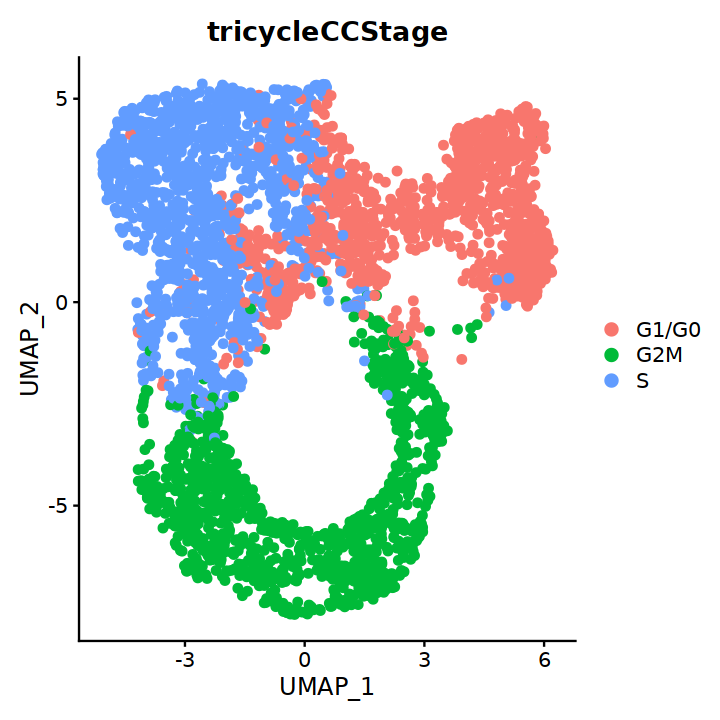

In [15]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(rc.integrated, reduction = "umap", group.by = "tricycleCCStage", label = FALSE, pt.size=2)

## Endo vs Mito

In [9]:
ploidy_markers <- read.csv("./tradeseq//Ploidy_markers.csv")

In [10]:
head(ploidy_markers)

X2C       X4C       X8C       X16C     
1 AT2G40550 AT3G25980 AT3G01430 AT1G73390
2 AT5G14530 AT1G48760 AT3G27925 AT2G19060
3 AT2G40090 AT3G23160 AT2G26890 AT2G23620
4 AT4G04340 AT3G23890 AT4G36400 AT2G44110
5 AT4G04880 AT4G17483 AT5G14460 AT3G61410
6 AT4G23860 AT4G29230 AT1G12550 AT1G48260

In [11]:
zscore <- function(x){(x-mean(x))/sd(x)}
range01 <- function(x){(x-min(x))/(max(x)-min(x))}

In [12]:
## Endocycle markers:
# SIAMESE (SIM) : AT5G04470
# SIAMESE-RELATED 1 (SMR1) : AT3G10525
# CELLDIVISION CONTROL 6 (CDC6) : AT2G29680
## Mitotic cell cycle markers:
# KNOLLE : AT1G08560
# CSLD5: AT1G02730
# HINKEL : AT1G18370
endo <- c("AT5G04470","AT3G10525","AT2G29680")
mito <- c("AT1G08560","AT1G02730","AT1G18370")

In [ ]:
pro

In [ ]:
tra

In [ ]:
elo

In [ ]:
mat

In [13]:
rc.integrated

An object of class Seurat 
17396 features across 3645 samples within 1 assay 
Active assay: RNA (17396 features, 17396 variable features)
 2 dimensional reductions calculated: pca, umap

## For Phloem Atlas

In [16]:
s1 <- intersect(endo, rownames(rc.integrated@assays$RNA@data))
length(s1)
s2 <- intersect(mito, rownames(rc.integrated@assays$RNA@data))
length(s2)
s2c <- intersect(ploidy_markers$X2C, rownames(rc.integrated@assays$RNA@data))
length(s2c)
s4c <- intersect(ploidy_markers$X4C, rownames(rc.integrated@assays$RNA@data))
length(s4c)
s8c <- intersect(ploidy_markers$X8C, rownames(rc.integrated@assays$RNA@data))
length(s8c)
s16c <- intersect(ploidy_markers$X16C, rownames(rc.integrated@assays$RNA@data))
length(s16c)

[1] 3

[1] 3

[1] 42

[1] 30

[1] 31

[1] 19

In [18]:
s1z <- as.numeric(apply(apply(rc.integrated@assays$RNA@data[s1,], 1, zscore), 1, function(x){mean(x)}))
s2z <- as.numeric(apply(apply(rc.integrated@assays$RNA@data[s2,], 1, zscore), 1, function(x){mean(x)}))
s2cz <- as.numeric(apply(apply(rc.integrated@assays$RNA@data[s2c,], 1, zscore), 1, function(x){mean(x)}))
s4cz <- as.numeric(apply(apply(rc.integrated@assays$RNA@data[s4c,], 1, zscore), 1, function(x){mean(x)}))
s8cz <- as.numeric(apply(apply(rc.integrated@assays$RNA@data[s8c,], 1, zscore), 1, function(x){mean(x)}))
s16cz <- as.numeric(apply(apply(rc.integrated@assays$RNA@data[s16c,], 1, zscore), 1, function(x){mean(x)}))

In [19]:
dat <- data.frame(cell_id=colnames(rc.integrated), Signature1=s1z, Signature2=s2z, Signature_2C=s2cz, Signature_4C=s4cz, Signature_8C=s8cz, Signature_16C=s16cz)

In [21]:
dat$anno <- rep("Unassigned", nrow(dat))

dat$anno[which((dat$Signature1 >=0) & (dat$Signature2 < 0) & (dat$Signature_4C >=0) & (dat$Signature_8C >=0) & (dat$Signature_16C >=0) & (dat$Signature_2C < 0))] = "Endo"
dat$anno[which((dat$Signature2 >=0) & (dat$Signature1 < 0)& (dat$Signature_2C >=0) & (dat$Signature_4C < 0) & (dat$Signature_8C < 0) & (dat$Signature_16C < 0))] = "Mito"


In [22]:
table(dat$anno)


      Endo       Mito Unassigned 
        19          5       3621 

In [23]:
afm <- rc.integrated@assays$RNA@data

In [24]:
nnc <- length(sort(table(dat$anno[which(dat$anno!="Unassigned")]))) 

In [25]:
nnc

[1] 2

In [26]:
as.character(unique(dat$anno[which(dat$anno!="Unassigned")]))

[1] "Endo" "Mito"

In [27]:
# Pool (average) expression values of each grouping
new_ref <- matrix(nrow=nrow(afm), ncol = 0)
for (i in 1:nnc) {
m <- as.matrix(afm[,which(dat$anno==as.character(unique(dat$anno[which(dat$anno!="Unassigned")]))[i])])
new_ref <- cbind(new_ref, rowSums(m)/ncol(m))
}
colnames(new_ref) <- as.character(unique(dat$anno[which(dat$anno!="Unassigned")]))
#gene.var <- apply(new_ref,1,var)

# Select top 200 highly variable genes 
#new_ref_sub <- new_ref[names(sort(gene.var,decreasing = TRUE)[1:200]),]

# Merge newly-built reference with atlas

merge.rownames <- function (x,y){
  dat <- merge(x = x, y = y, by = "row.names")
  rownames(dat) <- dat$Row.names
    dat <- dat[,-1]
  return(dat)
}

nr <- Reduce(merge.rownames, list(new_ref,afm)) 
nr <- as.matrix(nr)

In [30]:
colnames(nr)[0:nnc+1]

[1] "Endo"                   "Mito"                   "APL_AAACCCAAGTAACGTA-1"

In [31]:
# Correlation-based annotation using newly-built references
nr_label=colnames(new_ref)
nr_stat <- suppressWarnings(sapply((nnc+1):ncol(nr), function(i) sapply(1:nnc, function(j) cor.test(nr[,i],nr[,j],method = "pearson")[c(3,4)])))
nr_cor <- nr_stat[seq(2,nrow(nr_stat),2),]
nr_pvalue <- nr_stat[seq(1,nrow(nr_stat)-1,2),]                                                                                                        
nr_max <- sapply(1:(ncol(nr)-nnc), function(i) max(as.numeric(nr_cor[,i])))
nr_ident <- sapply(1:(ncol(nr)-nnc), function(i) nr_label[which(as.numeric(nr_cor[,i])==max(as.numeric(nr_cor[,i])))])
nr_maxp <- sapply(1:(ncol(nr)-nnc), function(i) as.numeric(nr_pvalue[,i])[which(as.numeric(nr_cor[,i])==max(as.numeric(nr_cor[,i])))])                     
names(nr_max) <- nr_ident

In [32]:
dat$anno.P <- as.character(nr_ident)
dat$anno.cor.P <- as.numeric(nr_max)
dat$anno.pvalue.P <- as.numeric(nr_maxp)

In [33]:
table(dat$anno.P)/c(ncol(rc.integrated))


     Endo      Mito 
0.3045267 0.6954733 

In [35]:
rc.integrated$endo_mito_anno <- dat$anno.P

In [36]:
zscore <- function(x){(x-mean(x))/sd(x)}
##
Mito <- subset(rc.integrated, subset= ((endo_mito_anno %in% c("Mito"))))
Endo <- subset(rc.integrated, subset= ((endo_mito_anno %in% c("Endo"))))

In [37]:
pltsg <- function(cell_cycle_position1, signature1, name1, cell_cycle_position2, signature2, name2, title){
    fit.l <- fit_periodic_loess(cell_cycle_position1,
                            signature1,
                            plot = FALSE, span=0.3,
                       x_lab = "Cell cycle position \u03b8", y_lab = "log2(keygene)")
    fit <- fit.l$pred.df
    fit.l <- fit_periodic_loess(cell_cycle_position2,
                            signature2,
                            plot = FALSE, span=0.3,
                       x_lab = "Cell cycle position \u03b8", y_lab = "log2(keygene)")

    fit <- rbind(fit, fit.l$pred.df)
    fit$treatment <- factor(c(rep(name1, 200) ,rep(name2, 200)), levels=c(name1, name2))
    options(repr.plot.width=8, repr.plot.height=6)
    print(ggplot(fit, aes(x=x,y=y, color=treatment)) + geom_path(size = 1, alpha = 1)+ labs(x = "θ", y = "smoothed expression level", title = title) + 
                scale_x_continuous(limits = c(0, 2 * pi), breaks = c(0, 
                    pi/2, pi, 3 * pi/2, 2 * pi), labels = paste0(c(0, 
                    0.5, 1, 1.5, 2), "π"), name = "θ")+
      #              scale_x_continuous(limits = c(0, 200), breaks = c(0, 
      #              50, 100, 150, 200), labels = paste0(c(0, 
      #              0.5, 1, 1.5, 2), "π"), name = "θ")+
      theme_bw(base_size = 14)+
      theme(legend.title=element_blank()))
} 

In [42]:
pltendo <- function(gene, title){
    s1z_Mito_Endo <- c(Mito@assays$RNA@data[which(rownames(Mito@assays$RNA@data) == gene),],Endo@assays$RNA@data[which(rownames(Endo@assays$RNA@data) == gene),])
    s1z_Mito <- s1z_Mito_Endo[1:ncol(Mito)]
    s1z_Endo <- s1z_Mito_Endo[(ncol(Mito)+1):length(s1z_Mito_Endo)]
    
    options(repr.plot.width=8, repr.plot.height=8)
    pltsg(Mito$tricyclePosition*pi, s1z_Mito, "Mitotic cycle", Endo$tricyclePosition*pi, s1z_Endo, "Endo cycle", title)
}

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


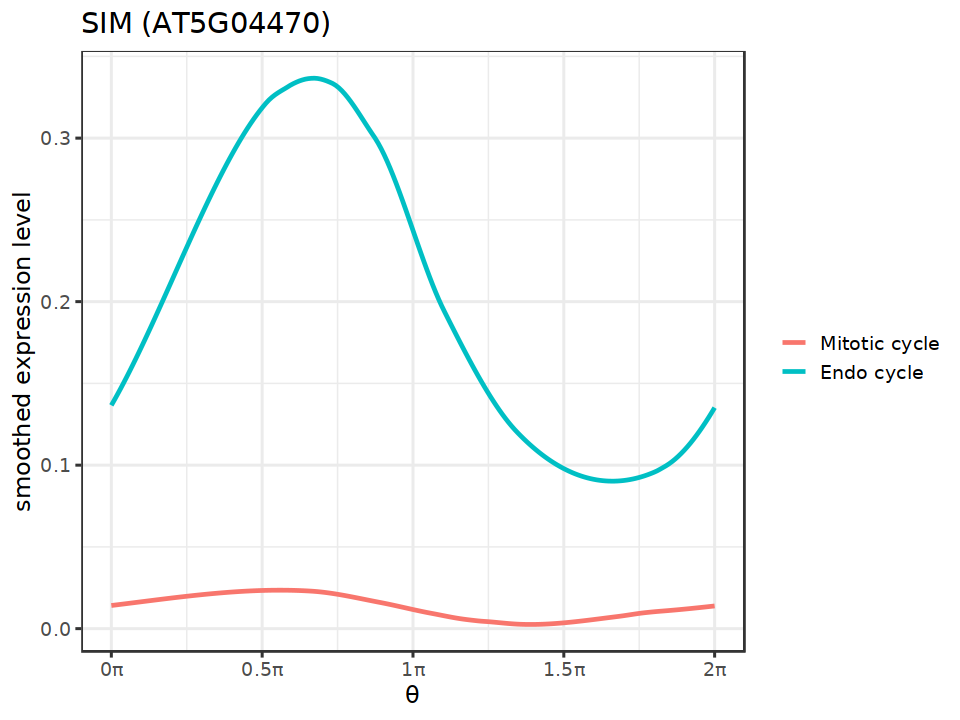

In [43]:
pltendo("AT5G04470", "SIM (AT5G04470)")

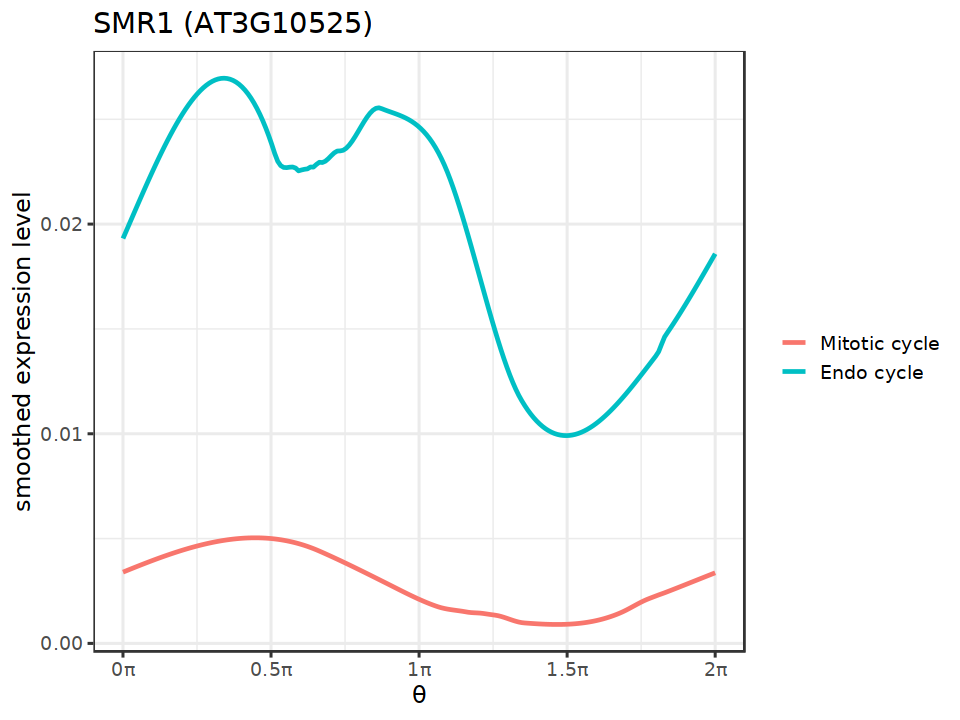

In [44]:
pltendo("AT3G10525", "SMR1 (AT3G10525)")

In [47]:
s1 <- readLines("./tradeseq/BES1up_G1_M2_genelist.txt")
s2 <- readLines("./tradeseq/BES1down_G1_M2_genelist.txt")

In [52]:
pltendo_s1 <- function(gene_list,title){
    s1z_Mito_Endo <- c(as.numeric(apply(apply(as.matrix(Mito@assays$RNA@data)[intersect(gene_list,rownames(Mito)),], 1, zscore), 1, function(x){sum(x,na.rm = TRUE)})),as.numeric(apply(apply(as.matrix(Endo@assays$RNA@data)[intersect(gene_list,rownames(Endo)),], 1, zscore), 1, function(x){sum(x,na.rm = TRUE)})))
    s1z_Mito <- s1z_Mito_Endo[1:ncol(Mito)]
    s1z_Endo <- s1z_Mito_Endo[(ncol(Mito)+1):length(s1z_Mito_Endo)]
    
    options(repr.plot.width=8, repr.plot.height=8)
    pltsg(Mito$tricyclePosition*pi, s1z_Mito, "Mitotic cycle", Endo$tricyclePosition*pi, s1z_Endo, "Endo cycle", title)
}

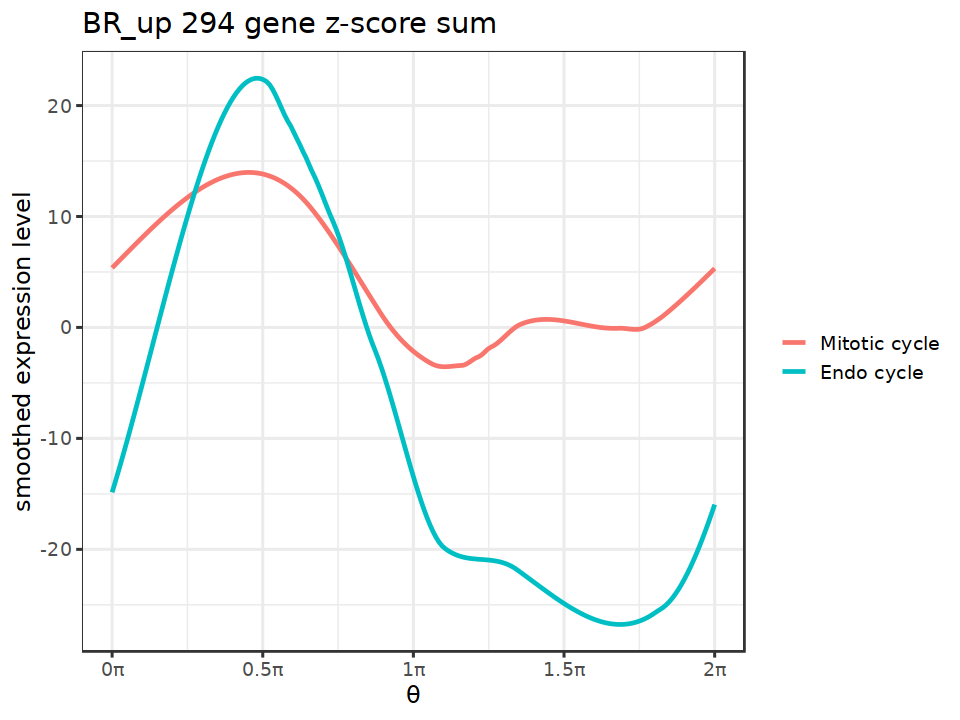

In [53]:
pltendo_s1(s1, "BR_up 294 gene z-score sum")

In [54]:
grDevices::cairo_pdf("./pdfs/BR_up_G1_M2_294_genes_mito_endo_phloem_atlas.pdf",width=8, height=6) 
pltendo_s1(s1, "BR_up 294 gene z-score sum")
dev.off()

png 
  2

In [55]:
saveRDS(rc.integrated,"./tricycle/phloem_atlas_seu4_proliferation_20240522.rds")

## For tricycle ref

In [14]:
s1 <- intersect(endo, rownames(pro@assays$SCT@data))
length(s1)
s2 <- intersect(mito, rownames(pro@assays$SCT@data))
length(s2)
s2c <- intersect(ploidy_markers$X2C, rownames(pro@assays$SCT@data))
length(s2c)
s4c <- intersect(ploidy_markers$X4C, rownames(pro@assays$SCT@data))
length(s4c)
s8c <- intersect(ploidy_markers$X8C, rownames(pro@assays$SCT@data))
length(s8c)
s16c <- intersect(ploidy_markers$X16C, rownames(pro@assays$SCT@data))
length(s16c)

[1] 3

[1] 3

[1] 42

[1] 30

[1] 35

[1] 33

In [109]:
#binary <- function(x){
#    count=0
#    for (i in 1:length(x)){
#        if (x[i]>=0){
#            count=count+1
#        } else {
#            count=count-1
#        }
#    }
#    return(count)
#}

In [18]:
s1z <- as.numeric(apply(apply(cbind(pro@assays$SCT@data[s1,], tra@assays$SCT@data[s1,], elo@assays$SCT@data[s1,], mat@assays$SCT@data[s1,]), 1, zscore), 1, function(x){mean(x)}))


In [17]:
cbind(pro@assays$SCT@data[s1,], tra@assays$SCT@data[s1,], elo@assays$SCT@data[s1,], mat@assays$SCT@data[s1,])

  [[ suppressing 34 column names ‘AAACCTGAGCGCCTCA_1’, ‘AAACCTGCAGGACGTA_1’, ‘AAACCTGGTATCACCA_1’ ... ]]



3 x 83636 sparse Matrix of class "dgCMatrix"
                                                                          
AT5G04470 . . . 2.079442 . . . . . . .         . .        . 1.945910 . . .
AT3G10525 . . . .        . . . . . . 0.6931472 . 1.098612 . 1.791759 . . .
AT2G29680 . . . .        . . . . . . .         . .        . .        . . .
                                                                            
AT5G04470 1.098612 . . 0.6931472 .         . . 0.6931472 0.6931472 . . . . .
AT3G10525 .        . . .         0.6931472 . . .         0.6931472 . . . . .
AT2G29680 .        . . .         .         . . .         .         . . . . .
                           
AT5G04470 1.098612 . ......
AT3G10525 .        . ......
AT2G29680 .        . ......

 .....suppressing 83602 columns in show(); maybe adjust 'options(max.print= *, width = *)'
 ..............................

In [23]:
s1z <- as.numeric(apply(apply(cbind(pro@assays$SCT@data[s1,], tra@assays$SCT@data[s1,], elo@assays$SCT@data[s1,], mat@assays$SCT@data[s1,]), 1, zscore), 1, function(x){mean(x)}))
s2z <- as.numeric(apply(apply(cbind(pro@assays$SCT@data[s2,], tra@assays$SCT@data[s2,], elo@assays$SCT@data[s2,], mat@assays$SCT@data[s2,]), 1, zscore), 1, function(x){mean(x)}))
s2cz <- as.numeric(apply(apply(cbind(pro@assays$SCT@data[s2c,], tra@assays$SCT@data[s2c,], elo@assays$SCT@data[s2c,], mat@assays$SCT@data[s2c,]), 1, zscore), 1, function(x){mean(x)}))
s4cz <- as.numeric(apply(apply(cbind(pro@assays$SCT@data[s4c,], tra@assays$SCT@data[s4c,], elo@assays$SCT@data[s4c,], mat@assays$SCT@data[s4c,]), 1, zscore), 1, function(x){mean(x)}))
s8cz <- as.numeric(apply(apply(cbind(pro@assays$SCT@data[s8c,], tra@assays$SCT@data[s8c,], elo@assays$SCT@data[s8c,], mat@assays$SCT@data[s8c,]), 1, zscore), 1, function(x){mean(x)}))
s16cz <- as.numeric(apply(apply(cbind(pro@assays$SCT@data[s16c,], tra@assays$SCT@data[s16c,], elo@assays$SCT@data[s16c,], mat@assays$SCT@data[s16c,]), 1, zscore), 1, function(x){mean(x)}))
sez <- as.numeric(apply(apply(cbind(pro@assays$SCT@data[unique(c(s4c,s8c,s16c)),], tra@assays$SCT@data[unique(c(s4c,s8c,s16c)),], elo@assays$SCT@data[unique(c(s4c,s8c,s16c)),], mat@assays$SCT@data[unique(c(s4c,s8c,s16c)),]), 1, zscore), 1, function(x){mean(x)}))

In [27]:
dat <- data.frame(cell_id=c(colnames(pro),colnames(tra),colnames(elo),colnames(mat)),zone=c(rep("proliferation domain",ncol(pro)),rep("transition domain",ncol(tra)),rep("elongation",ncol(elo)),rep("maturation",ncol(mat))), Signature1=s1z, Signature2=s2z, Signature_2C=s2cz, Signature_4C=s4cz, Signature_8C=s8cz, Signature_16C=s16cz, Signature_E=sez)

In [28]:
head(dat)

cell_id            zone                 Signature1 Signature2 Signature_2C
1 AAACCTGAGCGCCTCA_1 proliferation domain -0.4840441 -0.1089351  0.02082176 
2 AAACCTGCAGGACGTA_1 proliferation domain -0.4840441 -0.1089351  0.26251932 
3 AAACCTGGTATCACCA_1 proliferation domain -0.4840441 -0.1089351  0.25245732 
4 AAACGGGCAATAGAGT_1 proliferation domain  0.7140807 -0.1089351 -0.20722212 
5 AAACGGGCACTGTCGG_1 proliferation domain -0.4840441 -0.1089351 -0.06071600 
6 AAACGGGGTCACCCAG_1 proliferation domain -0.4840441 -0.1089351 -0.09531667 
  Signature_4C Signature_8C Signature_16C Signature_E
1  0.3498531   -0.1981609   -0.1434493    -0.01197821
2 -0.1161063    0.3857987    0.2374772     0.18220934
3  0.2653288   -0.1146687   -0.3223895    -0.06828972
4  0.1255241    0.6417355    0.1286403     0.31093463
5 -0.1187295   -0.2608747   -0.1995916    -0.19672474
6 -0.2347054   -0.1495408    0.1486331    -0.07520609

In [70]:
dat$anno <- rep("Unassigned", nrow(dat))

dat$anno[which((dat$Signature1 >=0) & (dat$Signature2 < 0) & (dat$Signature_4C >=0) & (dat$Signature_8C >=0) & (dat$Signature_16C >=0) & (dat$Signature_2C < 0))] = "Endo"
dat$anno[which((dat$Signature2 >=0) & (dat$Signature1 < 0)& (dat$Signature_2C >=0) & (dat$Signature_4C < 0) & (dat$Signature_8C < 0) & (dat$Signature_16C < 0))] = "Mito"


In [71]:
table(dat$anno, dat$zone)

            
             elongation maturation proliferation domain transition domain
  Endo              998        556                  458              1159
  Mito               42          9                   84                14
  Unassigned      82650      31919                51929             29992

In [72]:
table(dat$zone, dat$anno)/c(ncol(elo),ncol(mat),ncol(pro),ncol(tra))

                      
                               Endo         Mito   Unassigned
  elongation           0.0119249612 0.0005018521 0.9875731868
  maturation           0.0171161187 0.0002770595 0.9826068218
  proliferation domain 0.0087286311 0.0016008843 0.9896704846
  transition domain    0.0371891545 0.0004492219 0.9623616236

In [76]:
afm <- cbind(pro@assays$SCT@data, tra@assays$SCT@data, elo@assays$SCT@data, mat@assays$SCT@data)

In [73]:
nnc <- length(sort(table(dat$anno[which(dat$anno!="Unassigned")]))) 

In [74]:
nnc

[1] 2

In [77]:
as.character(unique(dat$anno[which(dat$anno!="Unassigned")]))

[1] "Endo" "Mito"

In [78]:
# Pool (average) expression values of each grouping
new_ref <- matrix(nrow=nrow(afm), ncol = 0)
for (i in 1:nnc) {
m <- as.matrix(afm[,which(dat$anno==as.character(unique(dat$anno[which(dat$anno!="Unassigned")]))[i])])
new_ref <- cbind(new_ref, rowSums(m)/ncol(m))
}
colnames(new_ref) <- as.character(unique(dat$anno[which(dat$anno!="Unassigned")]))
#gene.var <- apply(new_ref,1,var)

# Select top 200 highly variable genes 
#new_ref_sub <- new_ref[names(sort(gene.var,decreasing = TRUE)[1:200]),]

# Merge newly-built reference with atlas

merge.rownames <- function (x,y){
  dat <- merge(x = x, y = y, by = "row.names")
  rownames(dat) <- dat$Row.names
    dat <- dat[,-1]
  return(dat)
}

nr <- Reduce(merge.rownames, list(new_ref,afm)) 
nr <- as.matrix(nr)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 38.8 GiB”


In [79]:
colnames(nr)[0:nnc+1]

[1] "Endo"               "Mito"               "AAACCTGAGCGCCTCA_1"

In [80]:
# Correlation-based annotation using newly-built references
nr_label=colnames(new_ref)
nr_stat <- suppressWarnings(sapply((nnc+1):ncol(nr), function(i) sapply(1:nnc, function(j) cor.test(nr[,i],nr[,j],method = "pearson")[c(3,4)])))
nr_cor <- nr_stat[seq(2,nrow(nr_stat),2),]
nr_pvalue <- nr_stat[seq(1,nrow(nr_stat)-1,2),]                                                                                                        
nr_max <- sapply(1:(ncol(nr)-nnc), function(i) max(as.numeric(nr_cor[,i])))
nr_ident <- sapply(1:(ncol(nr)-nnc), function(i) nr_label[which(as.numeric(nr_cor[,i])==max(as.numeric(nr_cor[,i])))])
nr_maxp <- sapply(1:(ncol(nr)-nnc), function(i) as.numeric(nr_pvalue[,i])[which(as.numeric(nr_cor[,i])==max(as.numeric(nr_cor[,i])))])                     
names(nr_max) <- nr_ident

In [81]:
dat$anno.P <- as.character(nr_ident)
dat$anno.cor.P <- as.numeric(nr_max)
dat$anno.pvalue.P <- as.numeric(nr_maxp)

In [83]:
table(dat$zone, dat$anno.P)/c(ncol(elo),ncol(mat),ncol(pro),ncol(tra))

                      
                             Endo       Mito
  elongation           0.69741905 0.30258095
  maturation           0.90321389 0.09678611
  proliferation domain 0.28322311 0.71677689
  transition domain    0.68952350 0.31047650

## copy labels to objects

In [85]:
pro$endo_mito_G2M_anno <- dat$anno.P[which(dat$zone=="proliferation domain")]
pro$endo_mito_anno <- dat$anno.P[which(dat$zone=="proliferation domain")]

In [87]:
table(pro$endo_mito_anno, pro$celltype.anno.Li)

      
       Quiescent Center Columella Lateral Root Cap Atrichoblast Trichoblast
  Endo                0      1070            11984         1599          73
  Mito              385      1993            15511         6516        6476
      
       Cortex Endodermis Phloem Xylem Procambium Xylem Pole Pericycle
  Endo     98         18     10     9          0                    0
  Mito   2532       2759     78   164         88                 1059
      
       Phloem Pole Pericycle
  Endo                     0
  Mito                    49

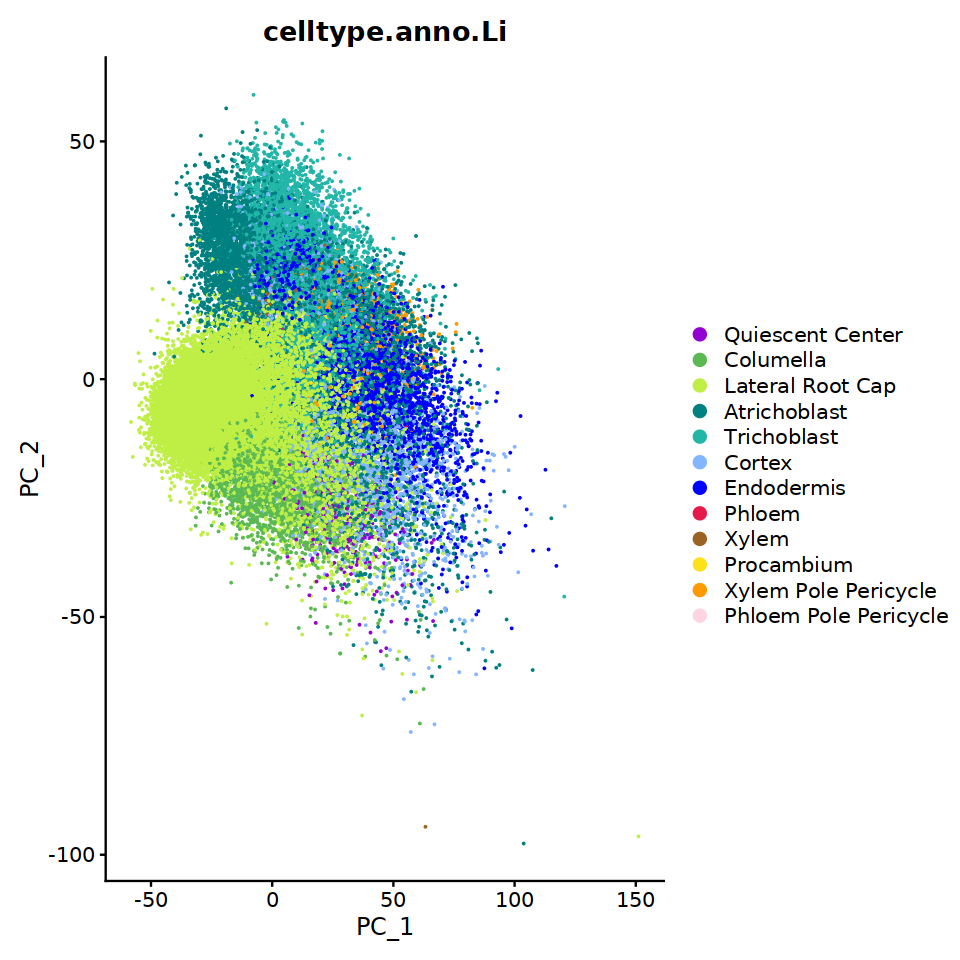

In [111]:
order <- c("Quiescent Center", "Ground Tissue","Columella", "Lateral Root Cap", "Atrichoblast", "Trichoblast", "Cortex", "Endodermis", "Phloem","Protophloem", "Xylem", "Procambium","Xylem Pole Pericycle","Phloem Pole Pericycle", "Protoxylem", "Metaxylem", "Unknown")
palette <- c("#9400d3", "#DCD0FF","#5ab953", "#bfef45", "#008080", "#21B6A8", "#82b6ff", "#0000FF","#e6194b", "#dd77ec", "#9a6324", "#ffe119", "#ff9900", "#ffd4e3", "#9a6324", "#ddaa6f", "#EEEEEE")
pro$celltype.anno.Li <- factor(pro$celltype.anno.Li, levels = order[sort(match(unique(pro$celltype.anno.Li),order))]) 
color <- palette[sort(match(unique(pro$celltype.anno.Li),order))]
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(pro, reduction = "pca", group.by = "celltype.anno.Li", cols=color)

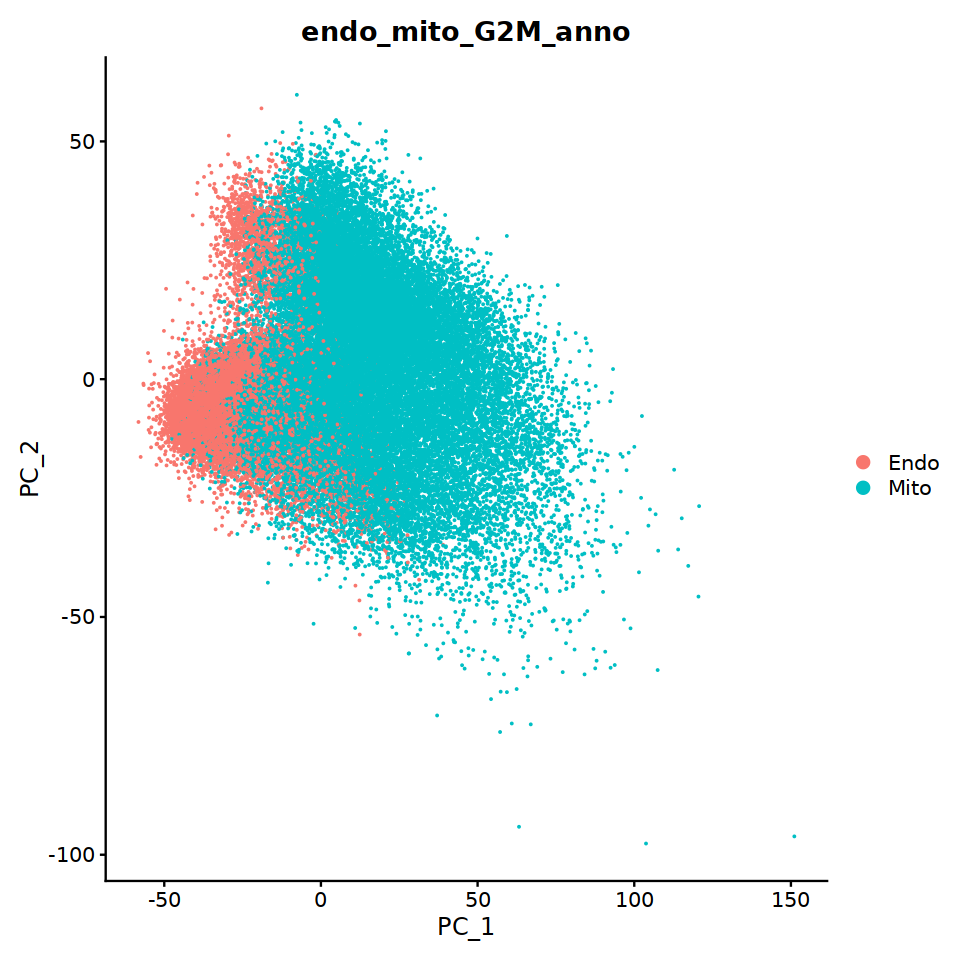

In [88]:
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(pro, reduction = "pca", group.by = "endo_mito_G2M_anno", label = FALSE)

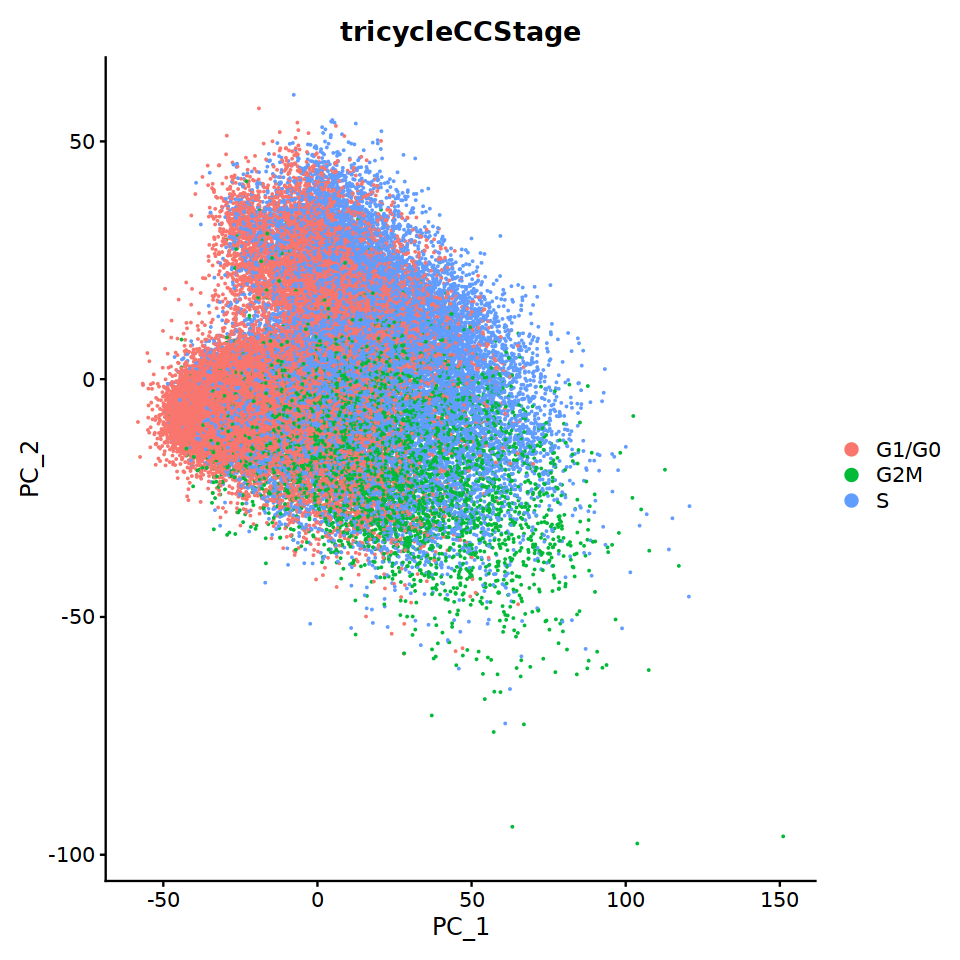

In [89]:
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(pro, reduction = "pca", group.by = "tricycleCCStage", label = FALSE)

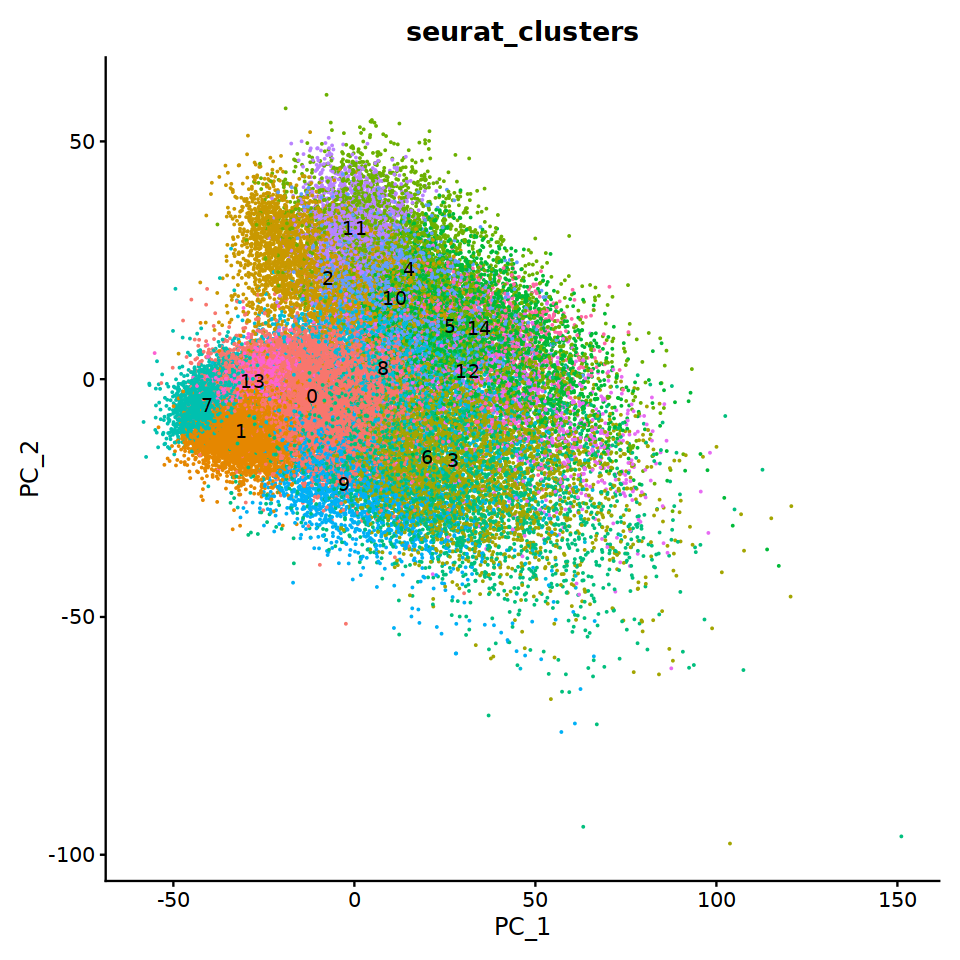

In [90]:
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(pro, reduction = "pca", group.by = "seurat_clusters", label = TRUE)+NoLegend()

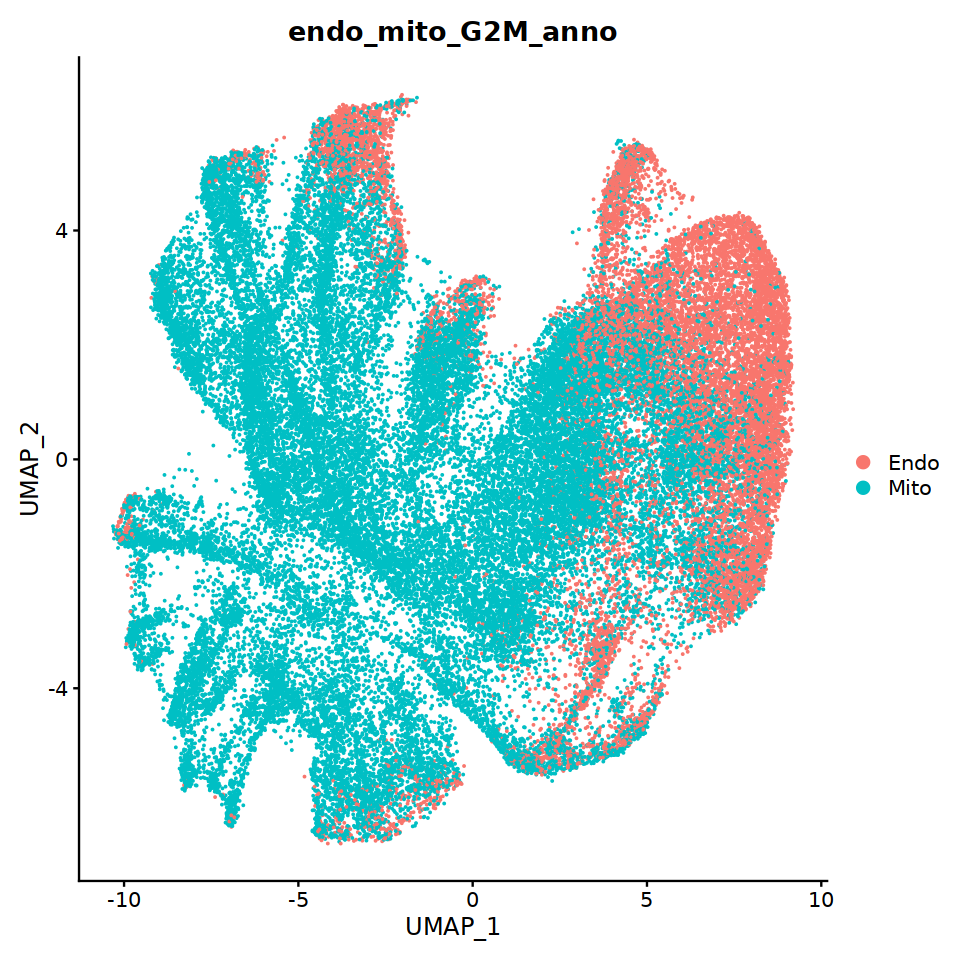

In [91]:
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(pro, reduction = "umap", group.by = "endo_mito_G2M_anno", label = FALSE)

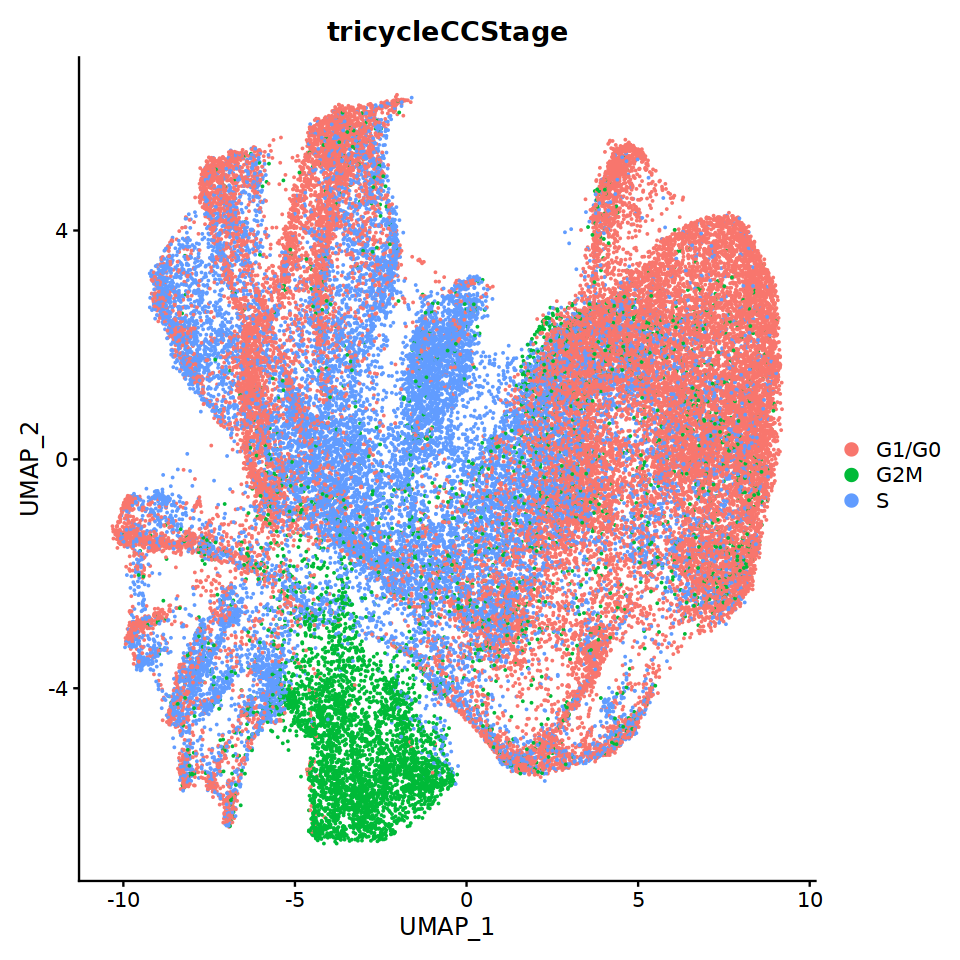

In [92]:
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(pro, reduction = "umap", group.by = "tricycleCCStage", label = FALSE)

## Check marker signature

In [99]:
pro$Signature_Endo <- dat$Signature1[which(dat$zone=="proliferation domain")]
pro$Signature_G2M <- dat$Signature2[which(dat$zone=="proliferation domain")]
pro$Signature_2C <- dat$Signature_2C[which(dat$zone=="proliferation domain")]
pro$Signature_4C <- dat$Signature_4C[which(dat$zone=="proliferation domain")]
pro$Signature_8C <- dat$Signature_8C[which(dat$zone=="proliferation domain")]
pro$Signature_16C <- dat$Signature_16C[which(dat$zone=="proliferation domain")]

In [100]:
table(pro$endo_mito_anno)


 Endo  Mito 
14861 37610 

In [101]:
Idents(pro) <- pro$endo_mito_anno

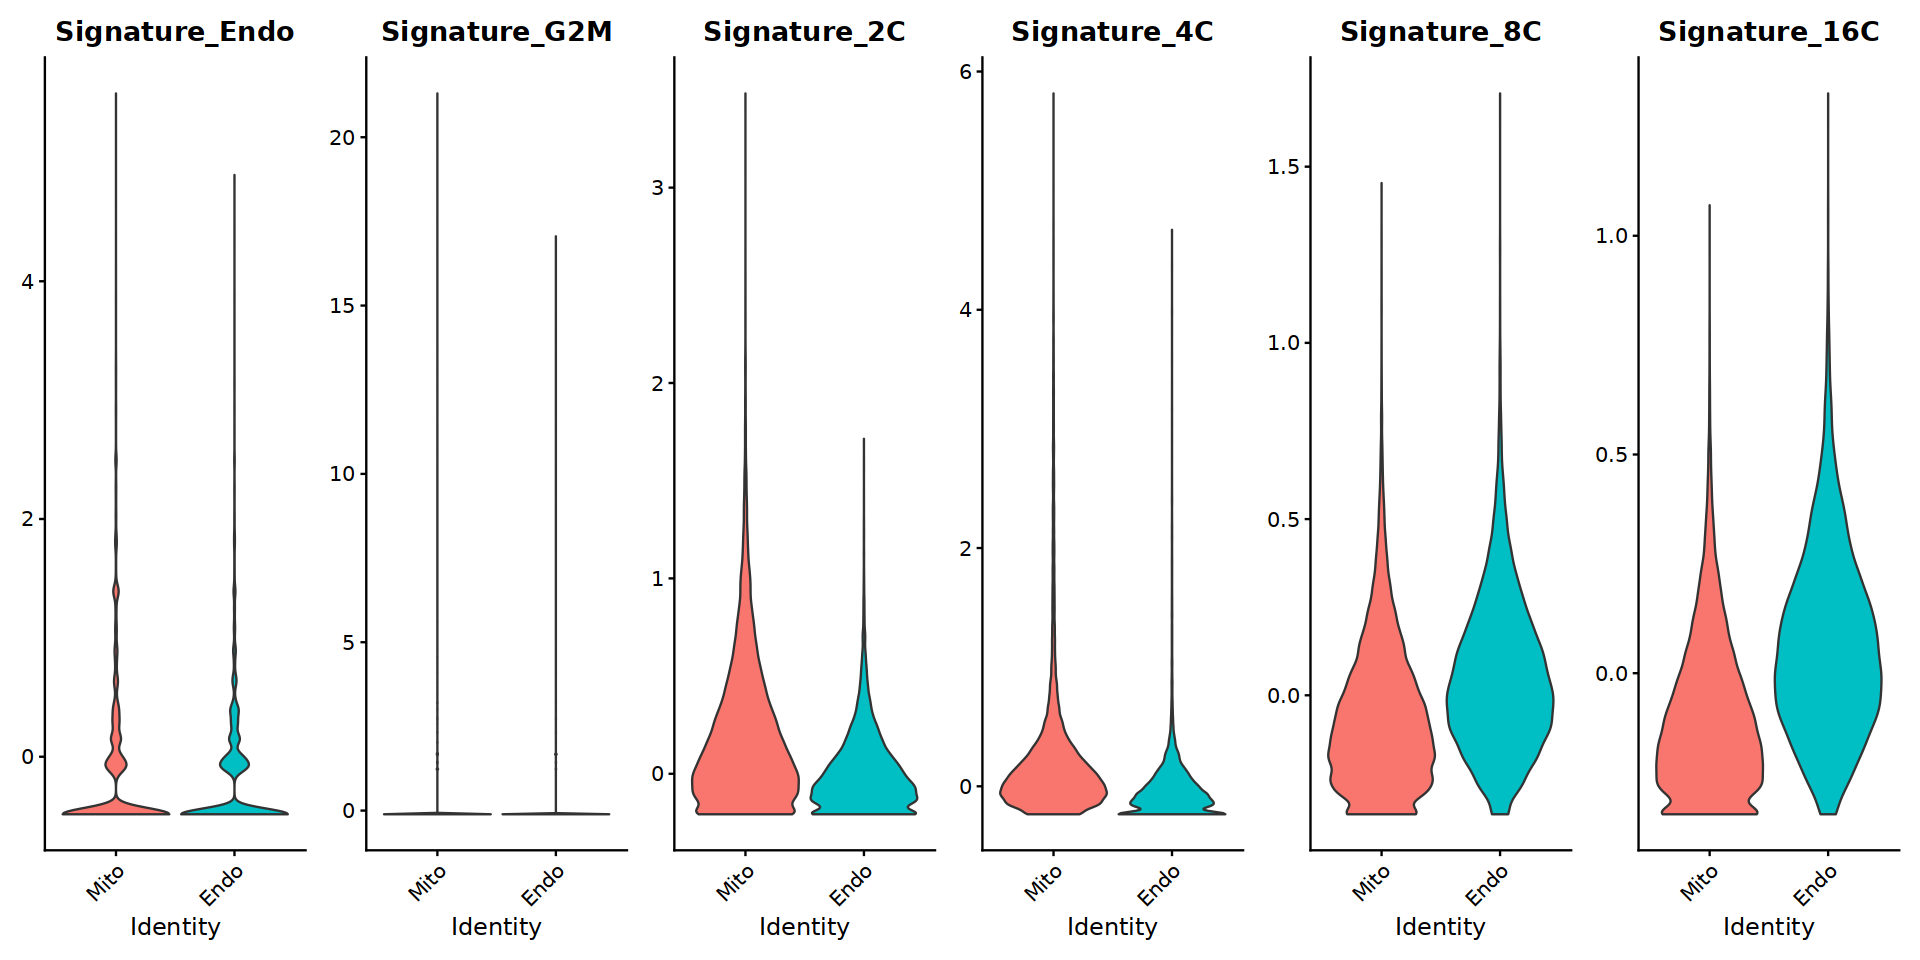

In [102]:
options(repr.plot.width=16, repr.plot.height=8)
VlnPlot(pro, pt.size=0, features = c("Signature_Endo", "Signature_G2M", "Signature_2C", "Signature_4C", "Signature_8C", "Signature_16C"), ncol=6)

## DE

In [43]:
#Idents(rc.integrated) <- rc.integrated$endo_mito_G2M_anno

In [44]:
#Clust_Markers <- FindAllMarkers(rc.integrated, only.pos = TRUE, max.cells.per.ident = 10000)

Calculating cluster Mito



In [ ]:
#Clust_Markers <- Clust_Markers %>% filter(p_val_adj <0.01) %>% arrange(p_val_adj) %>% arrange(cluster)

In [ ]:
#write.csv(Clust_Markers, "./scRNA-seq/Integrated_Objects/tricycle_18S_proliferation_endo_mito_DE_20240227.csv")

In [162]:
#saveRDS(rc.integrated, file = "./scRNA-seq/Integrated_Objects/rc.integrated_18S_WT_cell_cycle_seu4_all_genes_20230907.rds")

## Check out the diff between endo and mito cycle 

In [103]:
new.ref <- readRDS("./tradeseq/Tricycle_Reference_Arabidopsis_Root.rds")

In [104]:
sce <- as.SingleCellExperiment(pro)

In [105]:
## Tricycle estimation
sce <- project_cycle_space(sce,ref.m = new.ref)
sce <- estimate_cycle_position(sce)

sce$tricyclePosition <- (sce$tricyclePosition/pi) + 1.8
sce$tricyclePosition[which(sce$tricyclePosition>=2)] <- sce$tricyclePosition[which(sce$tricyclePosition>=2)] - 2
sce$tricyclePosition <- sce$tricyclePosition*pi


The number of projection genes found in the new data is 245.



In [106]:
colorRampPalette(brewer.pal(11, "Spectral"))(11)

[1] "#9E0142" "#D53E4F" "#F46D43" "#FDAE61" "#FEE08B" "#FFFFBF" "#E6F598"
 [8] "#ABDDA4" "#66C2A5" "#3288BD" "#5E4FA2"

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


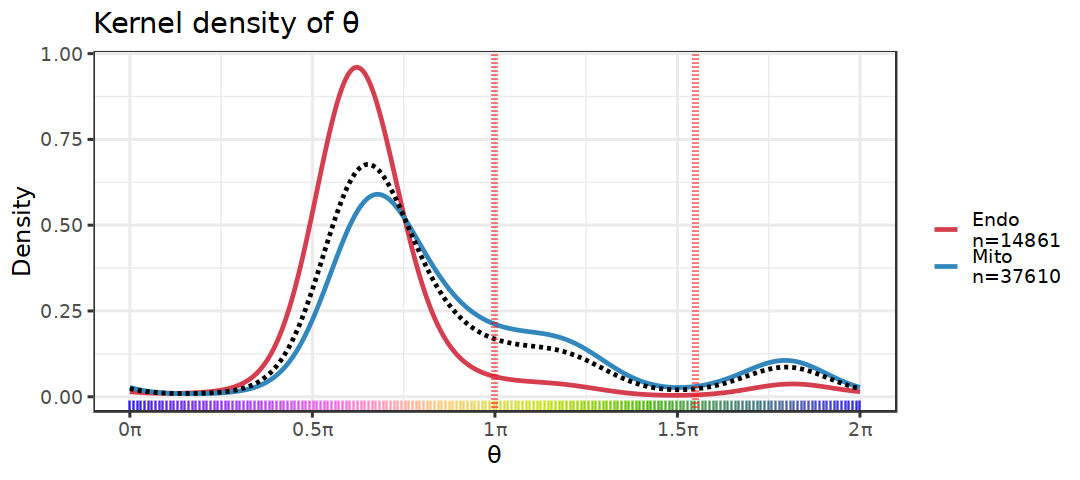

In [107]:
## Plot
options(repr.plot.width=9, repr.plot.height=4)
print(plot_ccposition_den(sce$tricyclePosition,
                sce$endo_mito_anno, '',
                bw = 10,line.size=1,line.alpha=1, fig.title = "Kernel density of \u03b8", palette.v=colorRampPalette(brewer.pal(11, "Spectral"))(11)[c(2,10)]) +
  theme_bw(base_size = 14)+ geom_vline(xintercept = 1*pi, linetype="dotted", 
                color = "red", size=1.5)+ geom_vline(xintercept = 1.55*pi, linetype="dotted", 
                color = "red", size=1.5))

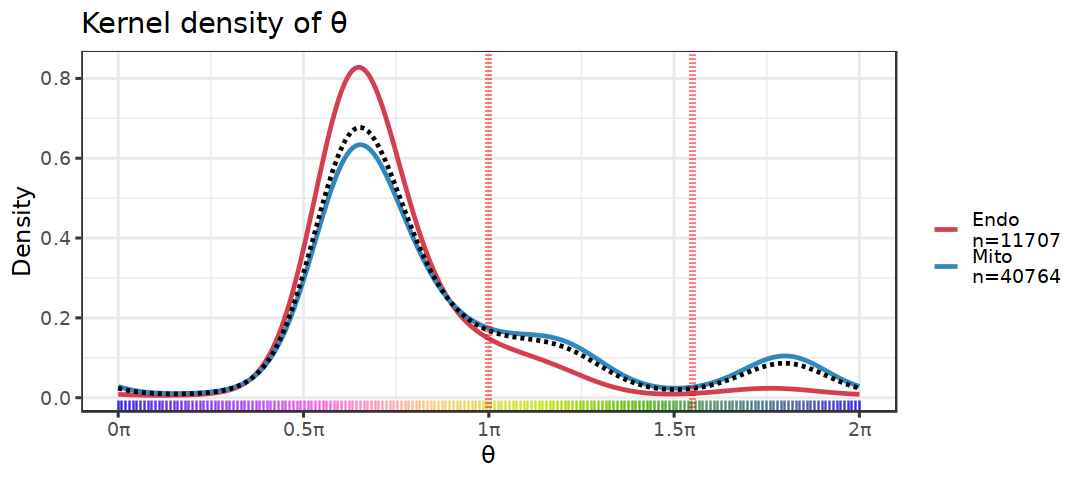

In [156]:
## Plot (Old)
#options(repr.plot.width=9, repr.plot.height=4)
#print(plot_ccposition_den(sce$tricyclePosition,
#                sce$endo_mito_anno, '',
#                bw = 10,line.size=1,line.alpha=1, fig.title = "Kernel density of \u03b8", palette.v=colorRampPalette(brewer.pal(11, "Spectral"))(11)[c(2,10)]) +
#  theme_bw(base_size = 14)+ geom_vline(xintercept = 1*pi, linetype="dotted", 
#                color = "red", size=1.5)+ geom_vline(xintercept = 1.55*pi, linetype="dotted", 
#                color = "red", size=1.5))

In [108]:
sce

class: SingleCellExperiment 
dim: 17479 52471 
metadata(0):
assays(1): logcounts
rownames(17479): AT1G05260 AT3G59370 ... AT3G03100 AT5G08290
rowData names(0):
colnames(52471): AAACCTGAGCGCCTCA_1 AAACCTGCAGGACGTA_1 ...
  TTTGGTTTCTATGCCC_18 TTTGTTGTCGTCGGGT_18
colData names(366): orig.ident nCount_RNA ... Signature_G2M ident
reducedDimNames(4): PCA UMAP UMAP_2D tricycleEmbedding
mainExpName: integrated
altExpNames(2): RNA SCT

In [109]:
saveRDS(pro,"./scRNA-seq/Integrated_Objects/rc.integrated_18S_WT_cell_cycle_seu4_all_genes_20230907.rds")

## Transition Domain

In [112]:
tra$endo_mito_G2M_anno <- dat$anno.P[which(dat$zone=="transition domain")]
tra$endo_mito_anno <- dat$anno.P[which(dat$zone=="transition domain")]

In [113]:
table(tra$endo_mito_anno, tra$celltype.anno.Li)

      
       Atrichoblast Cortex Endodermis Phloem Phloem Pole Pericycle Procambium
  Endo         5560   3670         85    295                    46         21
  Mito           28    264        161    441                    49        124
      
       Trichoblast Xylem Xylem Pole Pericycle
  Endo       11747    64                    1
  Mito        7684   120                  805

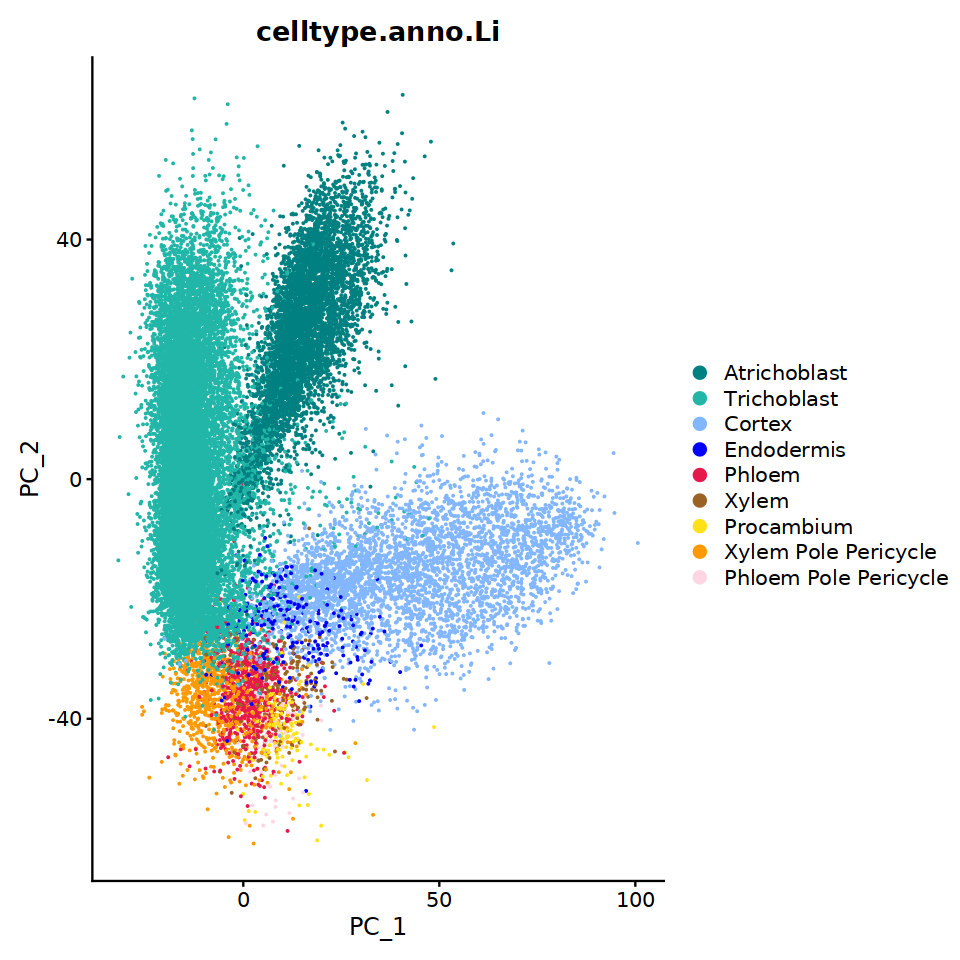

In [114]:
order <- c("Quiescent Center", "Ground Tissue","Columella", "Lateral Root Cap", "Atrichoblast", "Trichoblast", "Cortex", "Endodermis", "Phloem","Protophloem", "Xylem", "Procambium","Xylem Pole Pericycle","Phloem Pole Pericycle", "Protoxylem", "Metaxylem", "Unknown")
palette <- c("#9400d3", "#DCD0FF","#5ab953", "#bfef45", "#008080", "#21B6A8", "#82b6ff", "#0000FF","#e6194b", "#dd77ec", "#9a6324", "#ffe119", "#ff9900", "#ffd4e3", "#9a6324", "#ddaa6f", "#EEEEEE")
tra$celltype.anno.Li <- factor(tra$celltype.anno.Li, levels = order[sort(match(unique(tra$celltype.anno.Li),order))]) 
color <- palette[sort(match(unique(tra$celltype.anno.Li),order))]
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(tra, reduction = "pca", group.by = "celltype.anno.Li", cols=color)

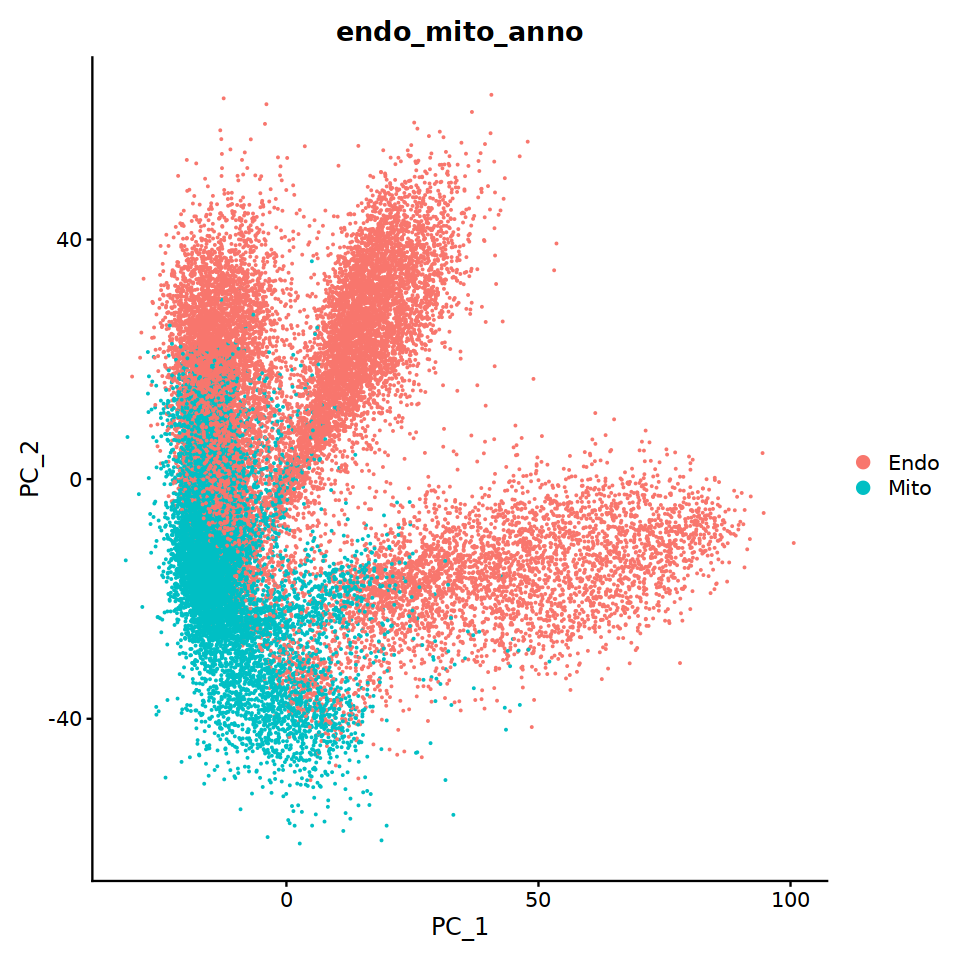

In [115]:
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(tra, reduction = "pca", group.by = "endo_mito_anno", label = FALSE)

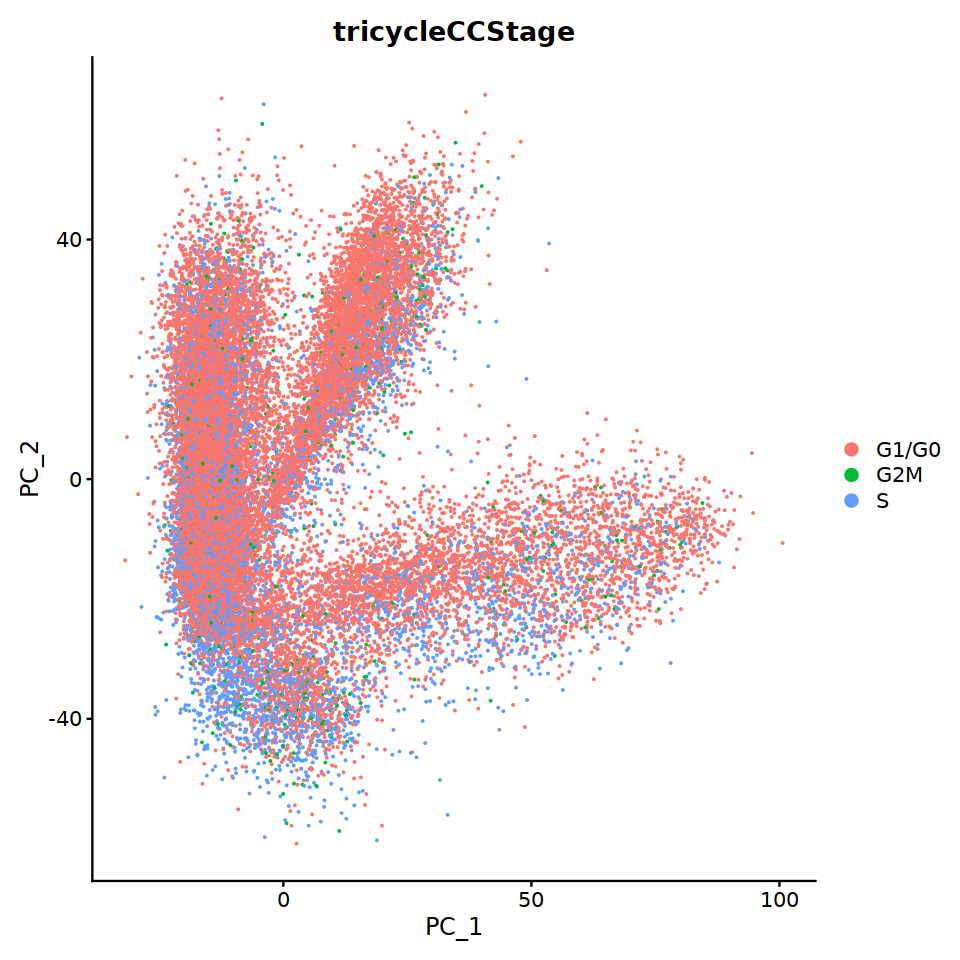

In [110]:
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(tra, reduction = "pca", group.by = "tricycleCCStage", label = FALSE)

In [116]:
sce <- as.SingleCellExperiment(tra)
## Tricycle estimation
sce <- project_cycle_space(sce,ref.m = new.ref)
sce <- estimate_cycle_position(sce)

sce$tricyclePosition <- (sce$tricyclePosition/pi) + 1.8
sce$tricyclePosition[which(sce$tricyclePosition>=2)] <- sce$tricyclePosition[which(sce$tricyclePosition>=2)] - 2
sce$tricyclePosition <- sce$tricyclePosition*pi


The number of projection genes found in the new data is 245.



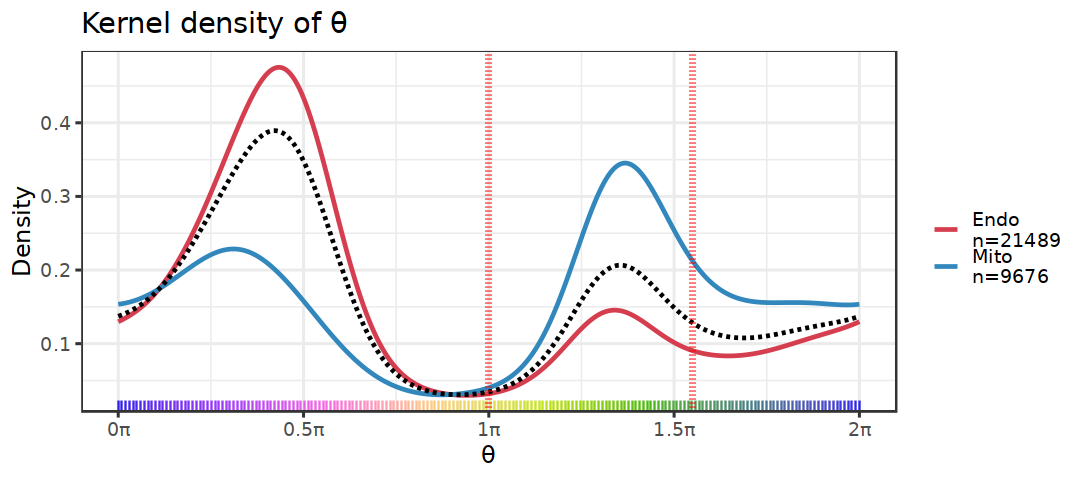

In [117]:
## Plot
options(repr.plot.width=9, repr.plot.height=4)
print(plot_ccposition_den(sce$tricyclePosition,
                sce$endo_mito_anno, '',
                bw = 10,line.size=1,line.alpha=1, fig.title = "Kernel density of \u03b8", palette.v=colorRampPalette(brewer.pal(11, "Spectral"))(11)[c(2,10)]) +
  theme_bw(base_size = 14)+ geom_vline(xintercept = 1*pi, linetype="dotted", 
                color = "red", size=1.5)+ geom_vline(xintercept = 1.55*pi, linetype="dotted", 
                color = "red", size=1.5))

In [132]:
saveRDS(tra,"./scRNA-seq/Integrated_Objects/rc.integrated_18S_WT_cell_cycle_transition_domain_seu4_all_genes_20240223.rds")

## Elongation

In [118]:
elo$endo_mito_anno <- dat$anno.P[which(dat$zone=="elongation")]

In [119]:
table(elo$endo_mito_anno, elo$celltype.anno.Li)

      
       Atrichoblast Cortex Endodermis Phloem Phloem Pole Pericycle Procambium
  Endo         5128   8560      12497   3631                  4663       8830
  Mito           37     27        333   1076                  1260       3160
      
       Trichoblast Xylem Xylem Pole Pericycle
  Endo        7971  4860                 2227
  Mito         359  1402                17669

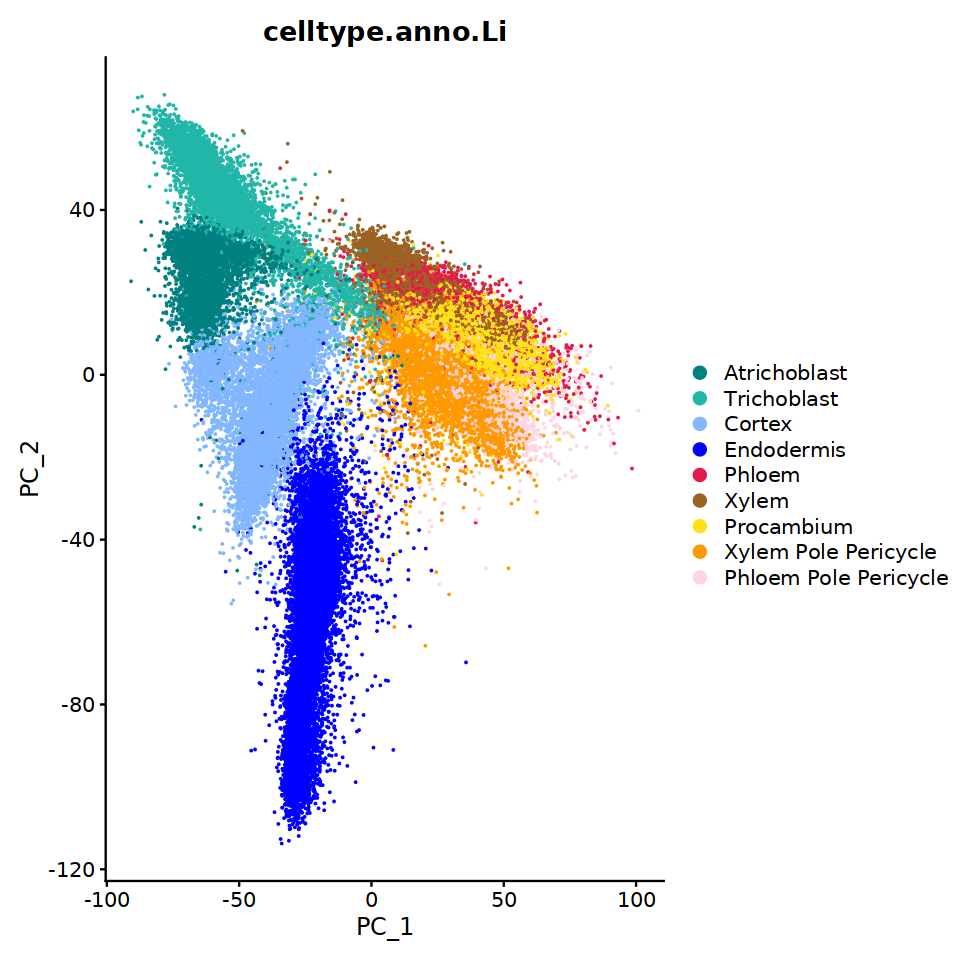

In [120]:
order <- c("Quiescent Center", "Ground Tissue","Columella", "Lateral Root Cap", "Atrichoblast", "Trichoblast", "Cortex", "Endodermis", "Phloem","Protophloem", "Xylem", "Procambium","Xylem Pole Pericycle","Phloem Pole Pericycle", "Protoxylem", "Metaxylem", "Unknown")
palette <- c("#9400d3", "#DCD0FF","#5ab953", "#bfef45", "#008080", "#21B6A8", "#82b6ff", "#0000FF","#e6194b", "#dd77ec", "#9a6324", "#ffe119", "#ff9900", "#ffd4e3", "#9a6324", "#ddaa6f", "#EEEEEE")
elo$celltype.anno.Li <- factor(elo$celltype.anno.Li, levels = order[sort(match(unique(elo$celltype.anno.Li),order))]) 
color <- palette[sort(match(unique(elo$celltype.anno.Li),order))]
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(elo, reduction = "pca", group.by = "celltype.anno.Li", cols=color)

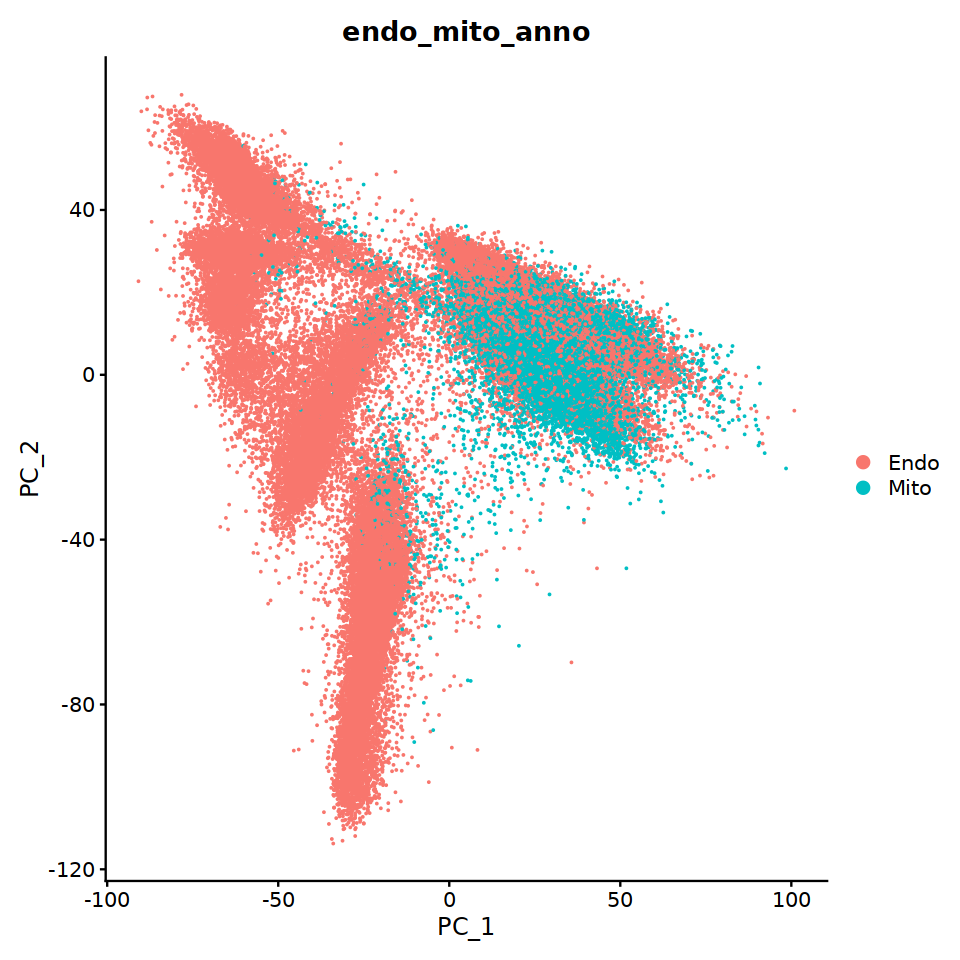

In [121]:
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(elo, reduction = "pca", group.by = "endo_mito_anno", label = FALSE)

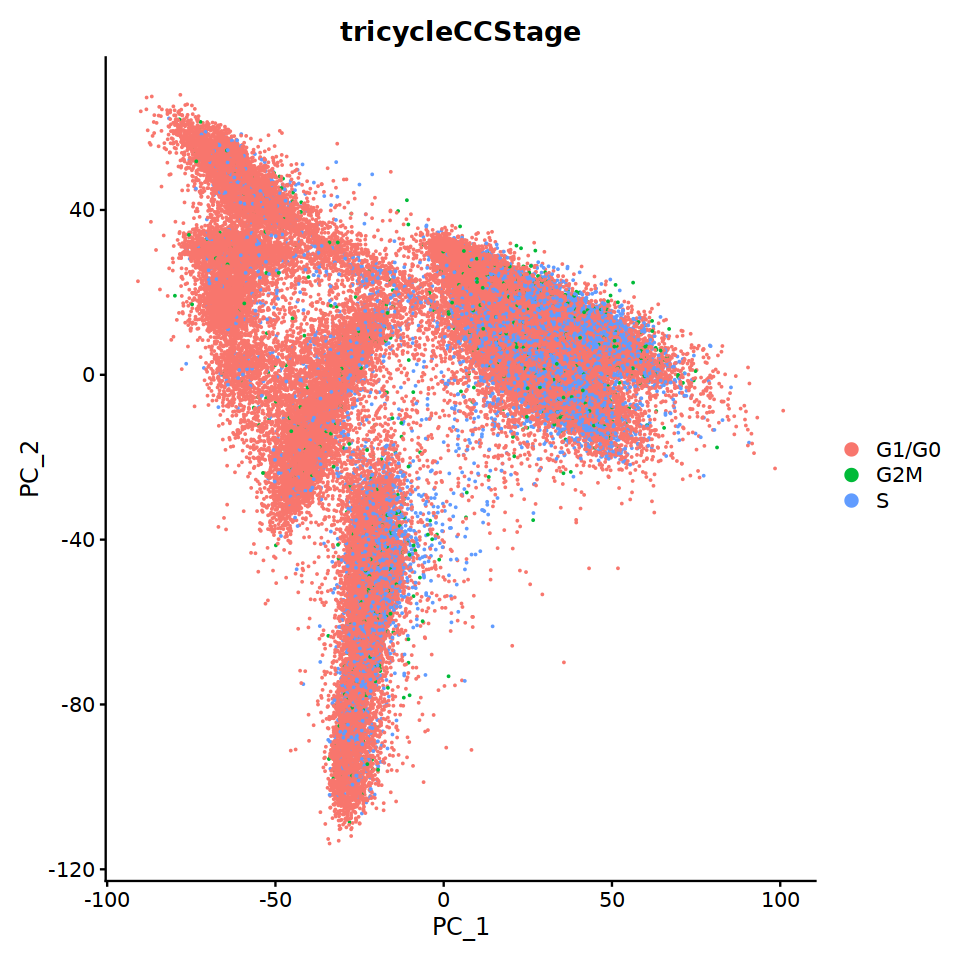

In [122]:
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(elo, reduction = "pca", group.by = "tricycleCCStage", label = FALSE)

In [123]:
sce <- as.SingleCellExperiment(elo)
## Tricycle estimation
sce <- project_cycle_space(sce,ref.m = new.ref)
sce <- estimate_cycle_position(sce)

sce$tricyclePosition <- (sce$tricyclePosition/pi) + 1.8
sce$tricyclePosition[which(sce$tricyclePosition>=2)] <- sce$tricyclePosition[which(sce$tricyclePosition>=2)] - 2
sce$tricyclePosition <- sce$tricyclePosition*pi


The number of projection genes found in the new data is 245.



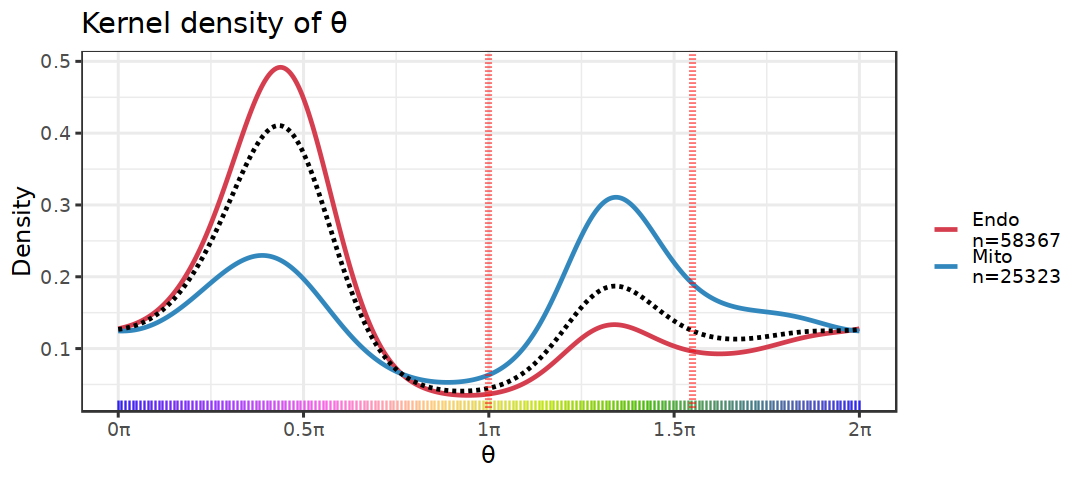

In [124]:
## Plot
options(repr.plot.width=9, repr.plot.height=4)
print(plot_ccposition_den(sce$tricyclePosition,
                sce$endo_mito_anno, '',
                bw = 10,line.size=1,line.alpha=1, fig.title = "Kernel density of \u03b8", palette.v=colorRampPalette(brewer.pal(11, "Spectral"))(11)[c(2,10)]) +
  theme_bw(base_size = 14)+ geom_vline(xintercept = 1*pi, linetype="dotted", 
                color = "red", size=1.5)+ geom_vline(xintercept = 1.55*pi, linetype="dotted", 
                color = "red", size=1.5))

In [133]:
saveRDS(elo,"./scRNA-seq/Integrated_Objects/rc.integrated_18S_WT_cell_cycle_elongation_seu4_all_genes_20240223.rds")

## Maturation

In [125]:
mat$endo_mito_anno <- dat$anno.P[which(dat$zone=="maturation")]

In [126]:
table(mat$endo_mito_anno, mat$celltype.anno.Li)

      
       Atrichoblast Columella Cortex Endodermis Lateral Root Cap Phloem
  Endo         2041      6368   1965       3560             4808    498
  Mito           11       158     46        124               96     59
      
       Phloem Pole Pericycle Procambium Trichoblast Xylem Xylem Pole Pericycle
  Endo                   503       1998        5379  1257                  963
  Mito                    63        325          42    46                 2174

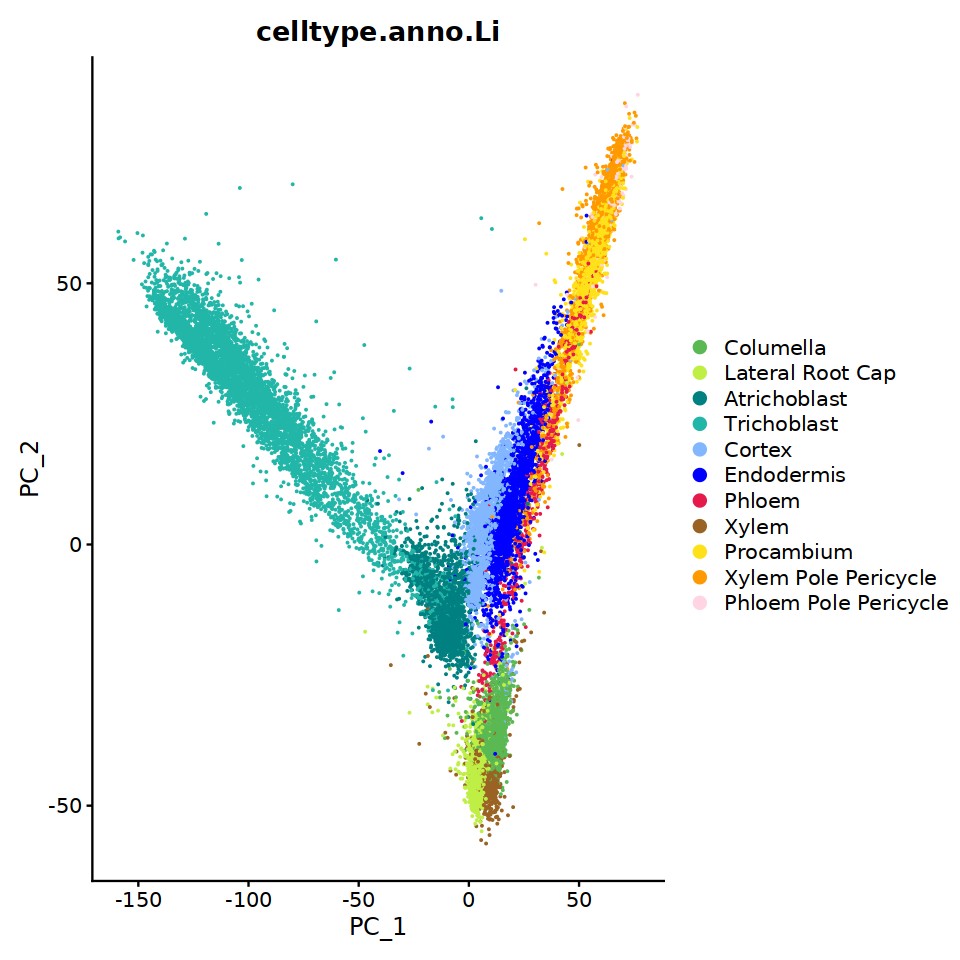

In [127]:
order <- c("Quiescent Center", "Ground Tissue","Columella", "Lateral Root Cap", "Atrichoblast", "Trichoblast", "Cortex", "Endodermis", "Phloem","Protophloem", "Xylem", "Procambium","Xylem Pole Pericycle","Phloem Pole Pericycle", "Protoxylem", "Metaxylem", "Unknown")
palette <- c("#9400d3", "#DCD0FF","#5ab953", "#bfef45", "#008080", "#21B6A8", "#82b6ff", "#0000FF","#e6194b", "#dd77ec", "#9a6324", "#ffe119", "#ff9900", "#ffd4e3", "#9a6324", "#ddaa6f", "#EEEEEE")
mat$celltype.anno.Li <- factor(mat$celltype.anno.Li, levels = order[sort(match(unique(mat$celltype.anno.Li),order))]) 
color <- palette[sort(match(unique(mat$celltype.anno.Li),order))]
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(mat, reduction = "pca", group.by = "celltype.anno.Li", cols=color)

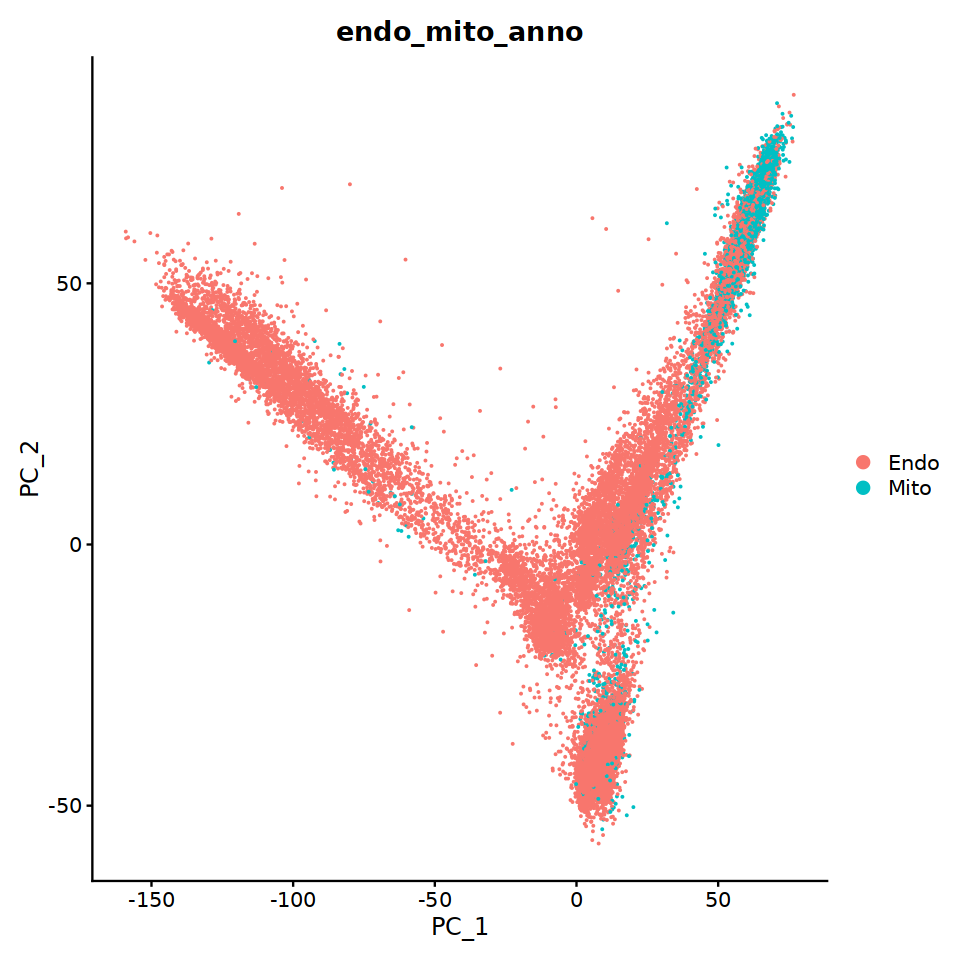

In [128]:
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(mat, reduction = "pca", group.by = "endo_mito_anno", label = FALSE)

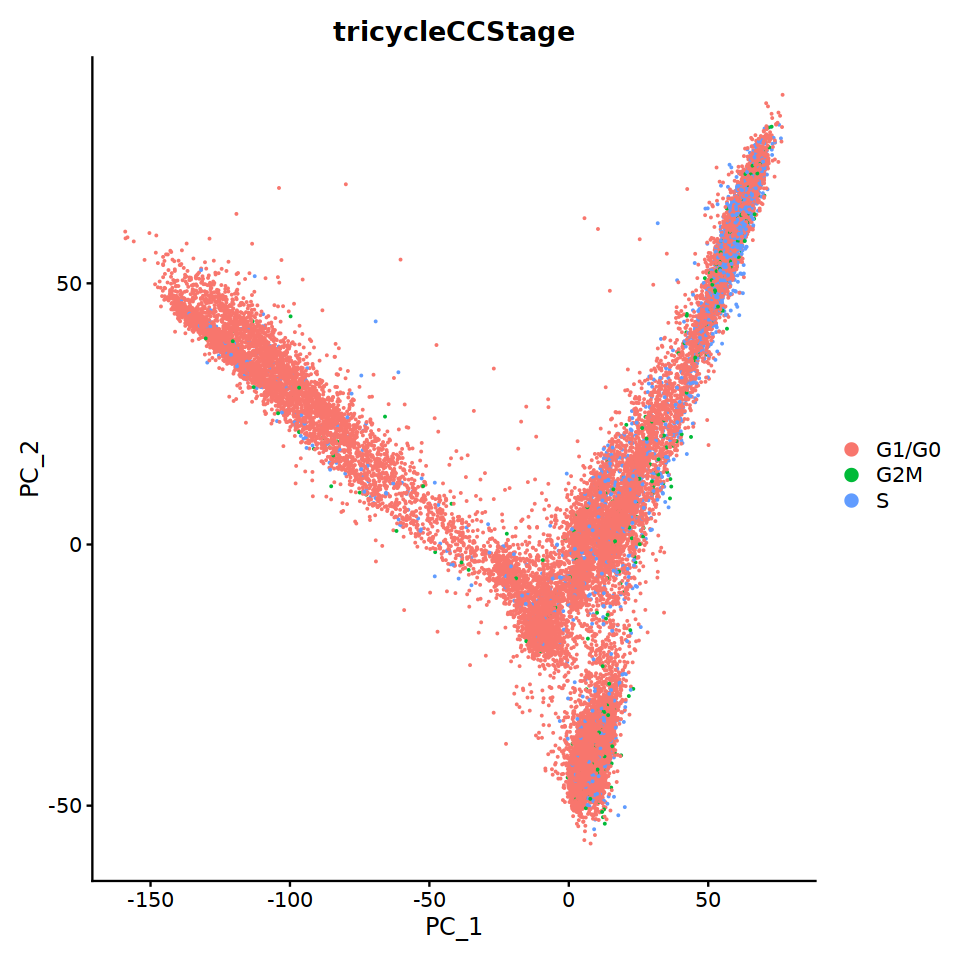

In [129]:
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(mat, reduction = "pca", group.by = "tricycleCCStage", label = FALSE)

In [130]:
sce <- as.SingleCellExperiment(mat)
## Tricycle estimation
sce <- project_cycle_space(sce,ref.m = new.ref)
sce <- estimate_cycle_position(sce)

sce$tricyclePosition <- (sce$tricyclePosition/pi) + 1.8
sce$tricyclePosition[which(sce$tricyclePosition>=2)] <- sce$tricyclePosition[which(sce$tricyclePosition>=2)] - 2
sce$tricyclePosition <- sce$tricyclePosition*pi


The number of projection genes found in the new data is 245.



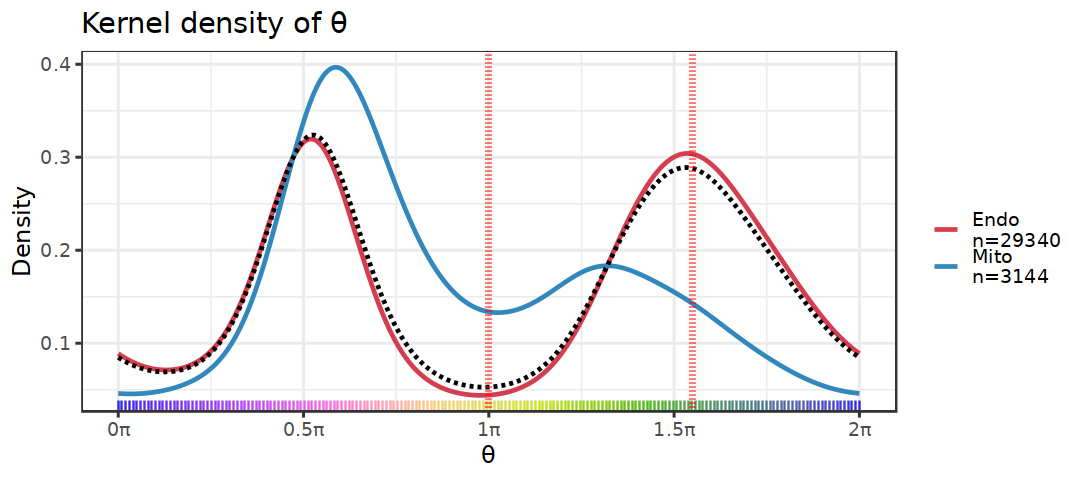

In [131]:
## Plot
options(repr.plot.width=9, repr.plot.height=4)
print(plot_ccposition_den(sce$tricyclePosition,
                sce$endo_mito_anno, '',
                bw = 10,line.size=1,line.alpha=1, fig.title = "Kernel density of \u03b8", palette.v=colorRampPalette(brewer.pal(11, "Spectral"))(11)[c(2,10)]) +
  theme_bw(base_size = 14)+ geom_vline(xintercept = 1*pi, linetype="dotted", 
                color = "red", size=1.5)+ geom_vline(xintercept = 1.55*pi, linetype="dotted", 
                color = "red", size=1.5))

In [134]:
saveRDS(mat,"./scRNA-seq/Integrated_Objects/rc.integrated_18S_WT_cell_cycle_maturation_distal_seu4_all_genes_20240223.rds")